# ETF Investing and Index Replication / Tracking

---

# ETF Investing
### What is ETF ? 
> __In finance, an Exchange-Traded Fund (ETF) is a type of investment fund that holds a portfolio of assets, such as stocks, bonds, or commodities, and typically aims to track the performance of a specific financial index. The relationship between an index and its ETF is often based on the ETF's objective to replicate or track the performance of that index.__



### What is ETF? 
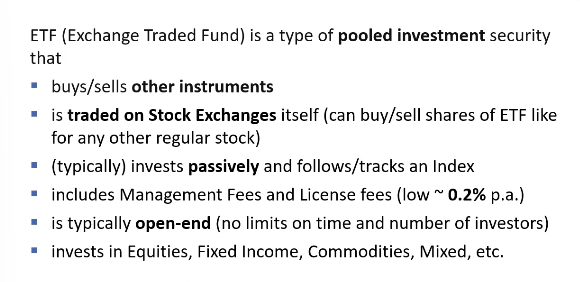

### ERF vs. direct srock investing
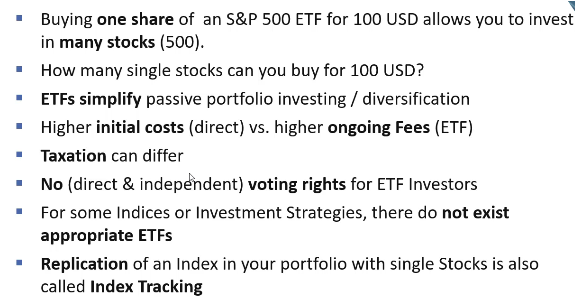

---

# Index Replication / Tracking 

### index replication - physical vs synthetic
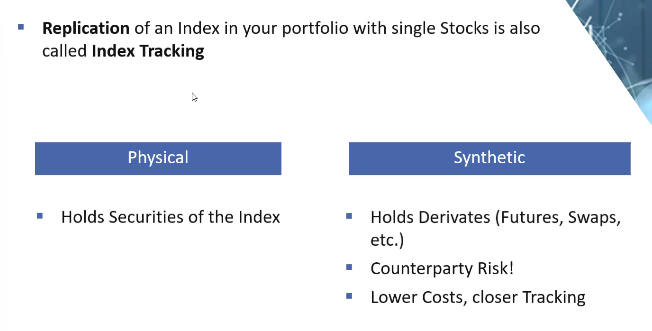


### Physical replication - methods
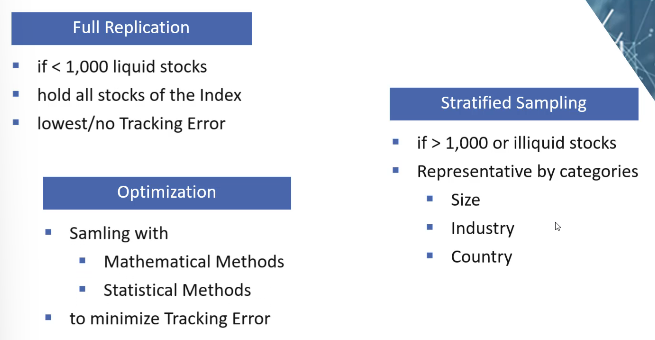


### Index replication - Traking quality
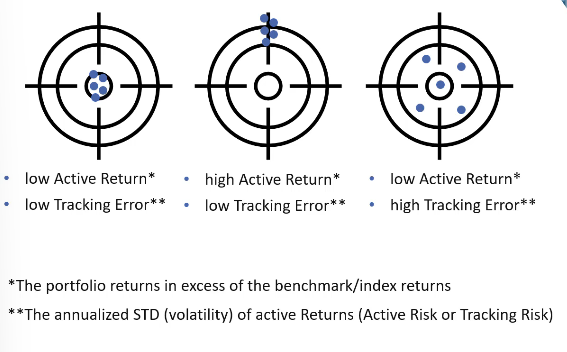

---

## S&P500 Index and ETFs - Full Replication

> In finance, "full replication" typically refers to a strategy employed by exchange-traded funds (ETFs) and other investment funds to replicate the performance of a specific benchmark or index by holding all of the securities or assets that make up that benchmark. This strategy is most commonly associated with index-tracking or index-replicating funds.

The Standard and Poor's 500, or simply the S&P 500, is a stock market index tracking the stock performance of __500 large companies__ listed on stock exchanges in the __United States__. It is one of the __most commonly followed equity indices__. As of December 31, 2020, more than $5.4 trillion was invested in assets tied to the performance of the index.

The S&P 500 index is a free-float weighted/__capitalization-weighted index__. As of August 31, 2022, the nine largest companies on the list of S&P 500 companies accounted for 27.8% of the market capitalization of the index and were, in order of highest to lowest weighting: Apple, Microsoft, Alphabet (including both class A & C shares), Amazon.com, Tesla, Berkshire Hathaway, UnitedHealth Group, Johnson & Johnson and ExxonMobil. (Source: Wikipedia)

In [26]:
import yfinance as yf
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt

In [27]:
# For the price return index:
index = "^GSPC" 

# For the total return index
index_tr = "^SP500TR"

#SPDR® S&P 500
etf = "SPY" 

Link to ETF:

https://www.ssga.com/us/en/intermediary/etfs/funds/spdr-sp-500-etf-trust-spy

In [28]:
# Load the historical price of the index,
# the total return index, and also the ETF. 
df = yf.download([index, index_tr, etf], end = "2022-11-30")
df

[*********************100%%**********************]  3 of 3 completed


Adj Close                                 Close               \
                   SPY        ^GSPC     ^SP500TR         SPY        ^GSPC   
Date                                                                        
1927-12-30         NaN    17.660000          NaN         NaN    17.660000   
1928-01-03         NaN    17.760000          NaN         NaN    17.760000   
1928-01-04         NaN    17.719999          NaN         NaN    17.719999   
1928-01-05         NaN    17.549999          NaN         NaN    17.549999   
1928-01-06         NaN    17.660000          NaN         NaN    17.660000   
...                ...          ...          ...         ...          ...   
2022-11-22  393.702209  4003.580078  8511.480469  399.899994  4003.580078   
2022-11-23  396.183228  4027.260010  8562.269531  402.420013  4027.260010   
2022-11-25  396.094604  4026.120117  8560.089844  402.329987  4026.120117   
2022-11-28  389.774048  3963.939941  8427.950195  395.910004  3963.939941   
2022-11-29  389.104675  3957.629883  8415.269531  395.230011  3957.629883   

                               High                                   Low  \
               ^SP500TR         SPY        ^GSPC     ^SP500TR         SPY   
Date                                                                        
1927-12-30          NaN         NaN    17.660000          NaN         NaN   
1928-01-03          NaN         NaN    17.760000          NaN         NaN   
1928-01-04          NaN         NaN    17.719999          NaN         NaN   
1928-01-05          NaN         NaN    17.549999          NaN         NaN   
1928-01-06          NaN         NaN    17.660000          NaN         NaN   
...                 ...         ...          ...          ...         ...   
2022-11-22  8511.480469  400.070007  4005.879883  8515.620117  395.149994   
2022-11-23  8562.269531  402.929993  4033.780029  8576.139648  399.309998   
2022-11-25  8560.089844  402.910004  4034.020020  8576.700195  401.540009   
2022-11-28  8427.950195  400.809998  4012.270020  8530.299805  395.109985   
2022-11-29  8415.269531  397.299988  3976.770020  8455.160156  393.299988   

                                            Open                            \
                  ^GSPC     ^SP500TR         SPY        ^GSPC     ^SP500TR   
Date                                                                         
1927-12-30    17.660000          NaN         NaN    17.660000          NaN   
1928-01-03    17.760000          NaN         NaN    17.760000          NaN   
1928-01-04    17.719999          NaN         NaN    17.719999          NaN   
1928-01-05    17.549999          NaN         NaN    17.549999          NaN   
1928-01-06    17.660000          NaN         NaN    17.660000          NaN   
...                 ...          ...         ...          ...          ...   
2022-11-22  3956.879883  8412.509766  396.630005  3965.510010  8429.780273   
2022-11-23  3998.659912  8501.690430  399.549988  4000.300049  8504.950195   
2022-11-25  4020.760010  8549.110352  401.829987  4023.340088  8554.639648   
2022-11-28  3955.770020  8410.660156  399.089996  4005.360107  8516.509766   
2022-11-29  3937.649902  8373.290039  396.049988  3964.189941  8428.040039   

                Volume                       
                   SPY       ^GSPC ^SP500TR  
Date                                         
1927-12-30         NaN           0      NaN  
1928-01-03         NaN           0      NaN  
1928-01-04         NaN           0      NaN  
1928-01-05         NaN           0      NaN  
1928-01-06         NaN           0      NaN  
...                ...         ...      ...  
2022-11-22  60429000.0  3887990000      0.0  
2022-11-23  68261600.0  3279720000      0.0  
2022-11-25  30545400.0  1706460000      0.0  
2022-11-28  67881600.0  3615430000      0.0  
2022-11-29  52310000.0  3546040000      0.0  

[23843 rows x 18 columns]

In [29]:
df.dropna(inplace = True)

In [30]:
prices = df.Close.copy()
prices

,SPY,^GSPC,^SP500TR
Date,,,
1993-01-29,43.937500,438.779999,520.489990
1993-02-01,44.250000,442.519989,525.030029
1993-02-02,44.343750,442.549988,525.219971
1993-02-03,44.812500,447.200012,530.750000
1993-02-04,45.000000,449.559998,533.890015
...,...,...,...
2022-11-22,399.899994,4003.580078,8511.480469
2022-11-23,402.420013,4027.260010,8562.269531
2022-11-25,402.329987,4026.120117,8560.089844


In [31]:
prices["SPYTR"] = df[("Adj Close", "SPY")]

In [32]:
prices

,SPY,^GSPC,^SP500TR,SPYTR
Date,,,,
1993-01-29,43.937500,438.779999,520.489990,24.941389
1993-02-01,44.250000,442.519989,525.030029,25.118792
1993-02-02,44.343750,442.549988,525.219971,25.171997
1993-02-03,44.812500,447.200012,530.750000,25.438086
1993-02-04,45.000000,449.559998,533.890015,25.544523
...,...,...,...,...
2022-11-22,399.899994,4003.580078,8511.480469,393.702209
2022-11-23,402.420013,4027.260010,8562.269531,396.183228
2022-11-25,402.329987,4026.120117,8560.089844,396.094604


In [33]:
# normalize pricec - easy to compare
norm = prices / prices.iloc[0]
norm

# We  can see that the total return of the index (^SP500TR) is little bit 
# higher from the ETF (SPYTR)

,SPY,^GSPC,^SP500TR,SPYTR
Date,,,,
1993-01-29,1.000000,1.000000,1.000000,1.000000
1993-02-01,1.007112,1.008524,1.008723,1.007113
1993-02-02,1.009246,1.008592,1.009088,1.009246
1993-02-03,1.019915,1.019190,1.019712,1.019915
1993-02-04,1.024182,1.024568,1.025745,1.024182
...,...,...,...,...
2022-11-22,9.101565,9.124345,16.352823,15.785096
2022-11-23,9.158919,9.178313,16.450402,15.884569
2022-11-25,9.156870,9.175715,16.446214,15.881016


What we can see here? 
- Full replication! the ETF if full replicate the index.  


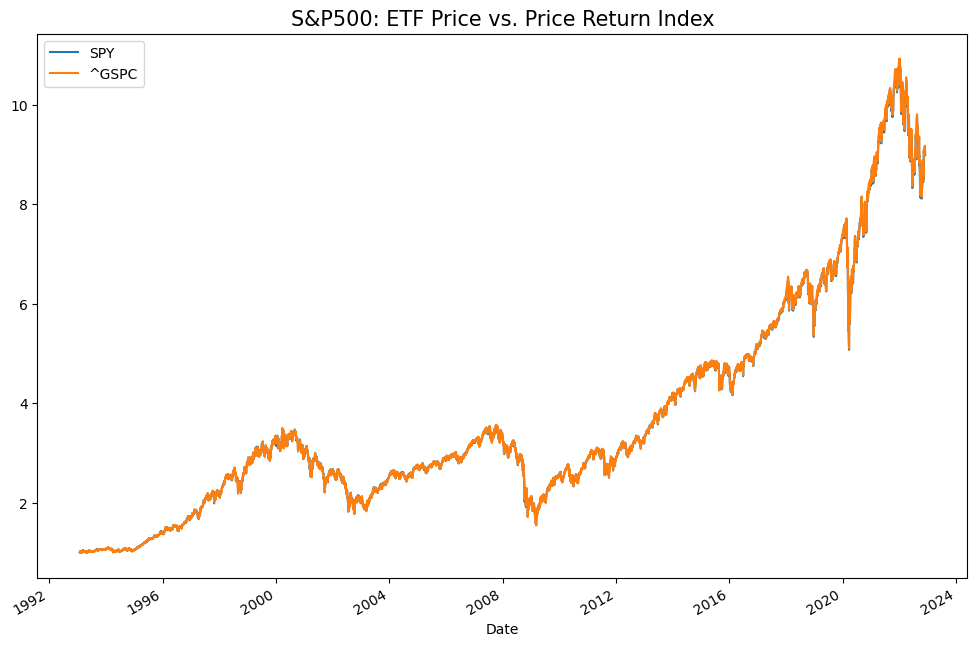

In [34]:
norm[["SPY", "^GSPC"]].plot(figsize = (12, 8))
plt.title("S&P500: ETF Price vs. Price Return Index", fontsize = 15)
plt.show()

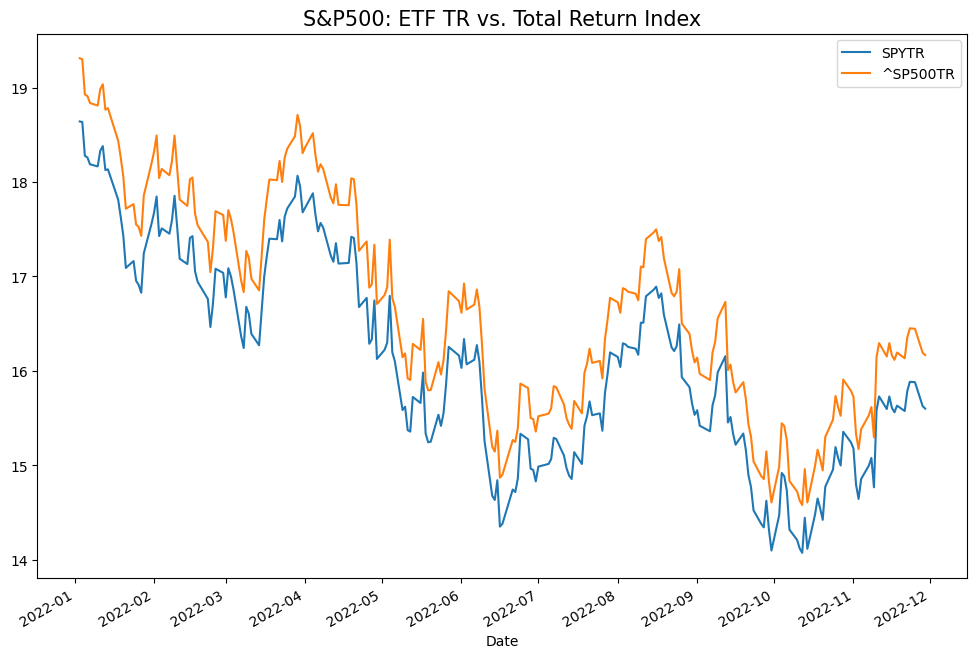

In [35]:
# zoom into 2022 
norm.loc["2022", ["SPYTR", "^SP500TR"]].plot(figsize = (12, 8))
plt.title("S&P500: ETF TR vs. Total Return Index", fontsize = 15)
plt.show()

In [36]:
# calculate the simple return
returns = prices.pct_change()
returns

,SPY,^GSPC,^SP500TR,SPYTR
Date,,,,
1993-01-29,NaN,NaN,NaN,NaN
1993-02-01,0.007112,0.008524,0.008723,0.007113
1993-02-02,0.002119,0.000068,0.000362,0.002118
1993-02-03,0.010571,0.010507,0.010529,0.010571
1993-02-04,0.004184,0.005277,0.005916,0.004184
...,...,...,...,...
2022-11-22,0.013457,0.013580,0.013606,0.013457
2022-11-23,0.006302,0.005915,0.005967,0.006302
2022-11-25,-0.000224,-0.000283,-0.000255,-0.000224


In [37]:
# A function that calculate:
# - the annualize risk
# - the Compund annual growth rate
def ann_risk_return(returns_df): # assumes simple returns as input
    summary = pd.DataFrame(index = returns_df.columns)
    summary["ann. Risk"] = returns_df.std() * np.sqrt(252)
    log_returns = np.log(returns_df + 1)
    summary["CAGR"] = np.exp(log_returns.mean() * 252) - 1
    return summary

In [38]:
# See the annualize risk and the compund annual growth rate 
summary = ann_risk_return(returns)
summary

,ann. Risk,CAGR
SPY,0.189603,0.076464
^GSPC,0.187240,0.076561
^SP500TR,0.187245,0.097844
SPYTR,0.189241,0.096530


__-> Total Return Difference due to ETF Fees__ (deducted from Dividends)

----

# Active Return and Active Risk (Tracking Error)

#### __How to measure Tracking Quality:__

- __Active Return__: __Return Differences__ between an instrument/portfolio and the Index
- __Tracking Error__ (Tracking Risk / Active Risk): __Volatility of Active Returns__ (standard deviation)
- Perfect Tracking: __Zero__ Active Return and Tracking Error

<p style="color:green">In that case , the return of ETF are pretty much udentical to the index returns.</p>

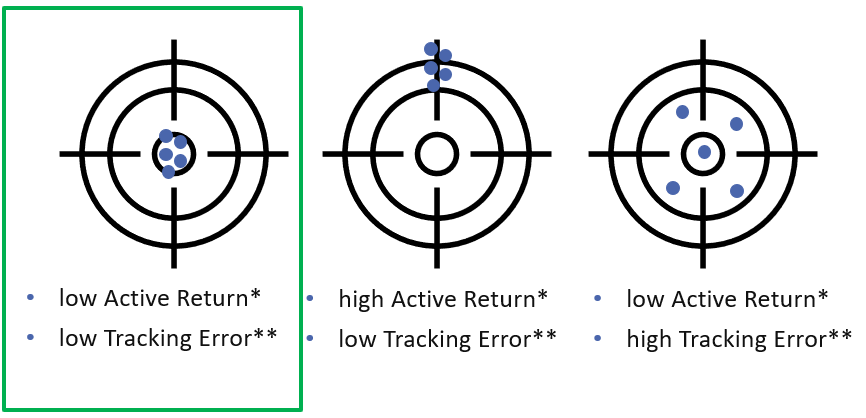

In [39]:
returns

,SPY,^GSPC,^SP500TR,SPYTR
Date,,,,
1993-01-29,NaN,NaN,NaN,NaN
1993-02-01,0.007112,0.008524,0.008723,0.007113
1993-02-02,0.002119,0.000068,0.000362,0.002118
1993-02-03,0.010571,0.010507,0.010529,0.010571
1993-02-04,0.004184,0.005277,0.005916,0.004184
...,...,...,...,...
2022-11-22,0.013457,0.013580,0.013606,0.013457
2022-11-23,0.006302,0.005915,0.005967,0.006302
2022-11-25,-0.000224,-0.000283,-0.000255,-0.000224


In [40]:
# Extract the return of the index (^GSPC) and the ETF (SPY) 
price_ret = returns[["^GSPC", "SPY"]].copy()
price_ret

,^GSPC,SPY
Date,,
1993-01-29,NaN,NaN
1993-02-01,0.008524,0.007112
1993-02-02,0.000068,0.002119
1993-02-03,0.010507,0.010571
1993-02-04,0.005277,0.004184
...,...,...
2022-11-22,0.013580,0.013457
2022-11-23,0.005915,0.006302
2022-11-25,-0.000283,-0.000224


In [41]:
# total returns
total_ret = returns[["^SP500TR", "SPYTR"]].copy()
total_ret

,^SP500TR,SPYTR
Date,,
1993-01-29,NaN,NaN
1993-02-01,0.008723,0.007113
1993-02-02,0.000362,0.002118
1993-02-03,0.010529,0.010571
1993-02-04,0.005916,0.004184
...,...,...
2022-11-22,0.013606,0.013457
2022-11-23,0.005967,0.006302
2022-11-25,-0.000255,-0.000224


In [42]:
# Function for calculate the tracking error 
def tracking(returns_df, index):
  
    # cakcukate the different between the ETF and index
    # sub() -> substraction 
    active_returns = returns_df.sub(returns_df[index], axis = "rows")
    summary = pd.DataFrame(index = returns_df.columns)
   
    # calculate the std of active return
    summary["TrackingError"] = active_returns.std() * np.sqrt(252)
   
    # compute the lod return of active return
    log_returns = np.log(active_returns + 1)
   
    # calculate the active return (annualize)
    summary["ActiveReturn"] = np.exp(log_returns.mean() * 252) - 1
   
    return summary

In [43]:
## price return 
# calculate the traking between the ETF (price_ret) and the SP500 index  (^GSPC) 
tracking(price_ret, "^GSPC") # price return

# Interpretation

# ^GSPC	0.000000	0.000000 
#  the tracking error & active return between the index to itself is 0.

# SPY	0.035413	-0.000289:
# this is the tracking error & active return between the ETF and the Index

,TrackingError,ActiveReturn
^GSPC,0.000000,0.000000
SPY,0.035413,-0.000289


In [61]:
## total return 
# calculate the tracking error between the ETF total return and  
# the index total return 
tracking(total_ret, "^SP500TR") # total return

# Interpretation

# ^SP500TR	0.000000	0.000000
# the tracking error & active return between the index return to itself is 0.

# SPYTR	0.035413	-0.000289:
# the tracking error & active return between the ETF return and the Index return

,TrackingError,ActiveReturn
^SP500TR,0.000000,0.000000
SPYTR,0.033878,-0.001411


__-> Active Return and Tracking Error of Index is zero (by definition).__ 

__-> Tracking Error of ETF close to zero (Full Replication)__

__-> Negative Active Return (-0.14%) due to ETF Fees__ (deducted from Dividends)

__Note__: The Tracking Error of the ETF is mainly due to the __Premium/Discount Mispricing of ETF shares__ relative to its Net Asset Value (NAV). The Tracking Error between the ETF´s NAV and the Index should be zero. 

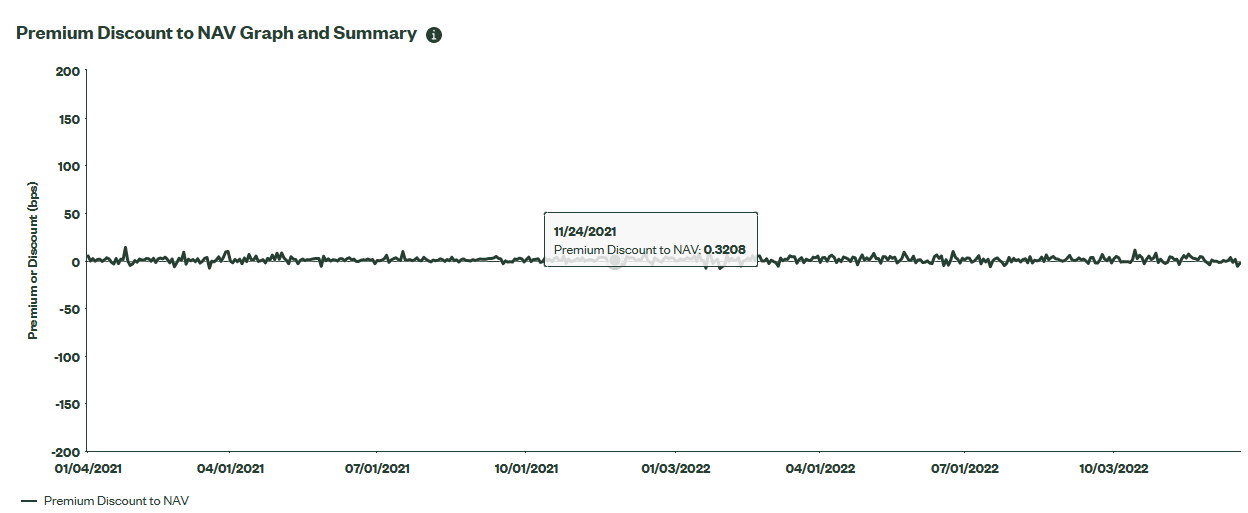

---

# Russell 3000 and ETFs - Representative Sampling

The Russell 3000 Index is a __capitalization-weighted__ stock market index that seeks to be a benchmark of the __entire U.S stock market__. It measures the performance of the __3,000 largest publicly held companies__ incorporated in America as measured by total market capitalization, and represents approximately __97%__ of the American public equity market. 

In [62]:
import yfinance as yf
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt

In [63]:
# Russell 3000 Index
index = "^RUA"

# Russell 3000  Index return 
index_tr = "^RUATR"

# Russell 3000 ETF 
etf = "IWV" #iShares Russell 3000 ETF

https://www.ishares.com/us/products/239714/ishares-russell-3000-etf

In [64]:
# download the index and its ETF
df = yf.download([index, etf])
df

[*********************100%%**********************]  2 of 2 completed


Adj Close                    Close                     High  \
                   IWV         ^RUA         IWV         ^RUA         IWV   
Date                                                                       
1987-09-10         NaN   178.830002         NaN   178.830002         NaN   
1987-09-11         NaN   181.339996         NaN   181.339996         NaN   
1987-09-14         NaN   181.789993         NaN   181.789993         NaN   
1987-09-15         NaN   179.270004         NaN   179.270004         NaN   
1987-09-16         NaN   177.889999         NaN   177.889999         NaN   
...                ...          ...         ...          ...         ...   
2023-11-03  248.410004  2493.260010  248.410004  2493.260010  249.350006   
2023-11-06  248.550003  2493.110107  248.550003  2493.110107  249.179993   
2023-11-07  249.199997  2500.550049  249.199997  2500.550049  249.630005   
2023-11-08  249.279999  2500.540039  249.279999  2500.540039  249.839996   
2023-11-09  247.110001  2478.419922  247.110001  2478.419922  249.770004   

                                Low                     Open               \
                   ^RUA         IWV         ^RUA         IWV         ^RUA   
Date                                                                        
1987-09-10   178.960007         NaN   177.050003         NaN   178.960007   
1987-09-11   181.470001         NaN   178.830002         NaN   178.830002   
1987-09-14   182.250000         NaN   180.750000         NaN   181.339996   
1987-09-15   181.789993         NaN   179.259995         NaN   181.789993   
1987-09-16   180.630005         NaN   177.860001         NaN   179.270004   
...                 ...         ...          ...         ...          ...   
2023-11-03  2502.250000  247.070007  2472.189941  247.070007  2472.189941   
2023-11-06  2499.860107  247.460007  2482.699951  249.000000  2495.449951   
2023-11-07  2505.000000  247.809998  2487.310059  248.369995  2494.260010   
2023-11-08  2507.409912  248.089996  2488.939941  249.699997  2502.919922   
2023-11-09  2507.239990  246.880005  2476.570068  249.770004  2502.489990   

              Volume       
                 IWV ^RUA  
Date                       
1987-09-10       NaN  0.0  
1987-09-11       NaN  0.0  
1987-09-14       NaN  0.0  
1987-09-15       NaN  0.0  
1987-09-16       NaN  0.0  
...              ...  ...  
2023-11-03  134600.0  0.0  
2023-11-06  158900.0  0.0  
2023-11-07   90700.0  0.0  
2023-11-08   86100.0  0.0  
2023-11-09  113800.0  0.0  

[9115 rows x 12 columns]

In [65]:
df.dropna(inplace = True)
df

Adj Close                    Close                     High  \
                   IWV         ^RUA         IWV         ^RUA         IWV   
Date                                                                       
2000-05-26   50.767971   748.979980   75.281250   748.979980   75.281250   
2000-05-30   52.222080   775.400024   77.437500   775.400024   77.437500   
2000-05-31   52.780548   773.989990   78.265625   773.989990   78.265625   
2000-06-01   52.928062   791.700012   78.484375   791.700012   79.000000   
2000-06-02   54.614010   810.729980   80.984375   810.729980   81.250000   
...                ...          ...         ...          ...         ...   
2023-11-03  248.410004  2493.260010  248.410004  2493.260010  249.350006   
2023-11-06  248.550003  2493.110107  248.550003  2493.110107  249.179993   
2023-11-07  249.199997  2500.550049  249.199997  2500.550049  249.630005   
2023-11-08  249.279999  2500.540039  249.279999  2500.540039  249.839996   
2023-11-09  247.110001  2478.419922  247.110001  2478.419922  249.770004   

                                Low                     Open               \
                   ^RUA         IWV         ^RUA         IWV         ^RUA   
Date                                                                        
2000-05-26   755.469971   75.281250   744.530029   75.281250   750.090027   
2000-05-30   775.400024   76.031250   748.979980   76.031250   748.979980   
2000-05-31   782.229980   77.687500   771.140015   77.687500   775.400024   
2000-06-01   791.700012   78.156250   773.989990   78.156250   773.989990   
2000-06-02   812.929993   80.968750   791.710022   81.250000   791.710022   
...                 ...         ...          ...         ...          ...   
2023-11-03  2502.250000  247.070007  2472.189941  247.070007  2472.189941   
2023-11-06  2499.860107  247.460007  2482.699951  249.000000  2495.449951   
2023-11-07  2505.000000  247.809998  2487.310059  248.369995  2494.260010   
2023-11-08  2507.409912  248.089996  2488.939941  249.699997  2502.919922   
2023-11-09  2507.239990  246.880005  2476.570068  249.770004  2502.489990   

              Volume       
                 IWV ^RUA  
Date                       
2000-05-26     300.0  0.0  
2000-05-30    1700.0  0.0  
2000-05-31     700.0  0.0  
2000-06-01     800.0  0.0  
2000-06-02   19100.0  0.0  
...              ...  ...  
2023-11-03  134600.0  0.0  
2023-11-06  158900.0  0.0  
2023-11-07   90700.0  0.0  
2023-11-08   86100.0  0.0  
2023-11-09  113800.0  0.0  

[5873 rows x 12 columns]

In [66]:
# Copy the close price of the index and its ETF
prices = df.Close.copy()
prices

,IWV,^RUA
Date,,
2000-05-26,75.281250,748.979980
2000-05-30,77.437500,775.400024
2000-05-31,78.265625,773.989990
2000-06-01,78.484375,791.700012
2000-06-02,80.984375,810.729980
...,...,...
2023-11-03,248.410004,2493.260010
2023-11-06,248.550003,2493.110107
2023-11-07,249.199997,2500.550049


In [67]:
# Normaliz the close price of the Index and its ETF
norm = prices / prices.iloc[0]
norm

,IWV,^RUA
Date,,
2000-05-26,1.000000,1.000000
2000-05-30,1.028643,1.035275
2000-05-31,1.039643,1.033392
2000-06-01,1.042549,1.057038
2000-06-02,1.075758,1.082445
...,...,...
2023-11-03,3.299759,3.328874
2023-11-06,3.301619,3.328674
2023-11-07,3.310253,3.338607


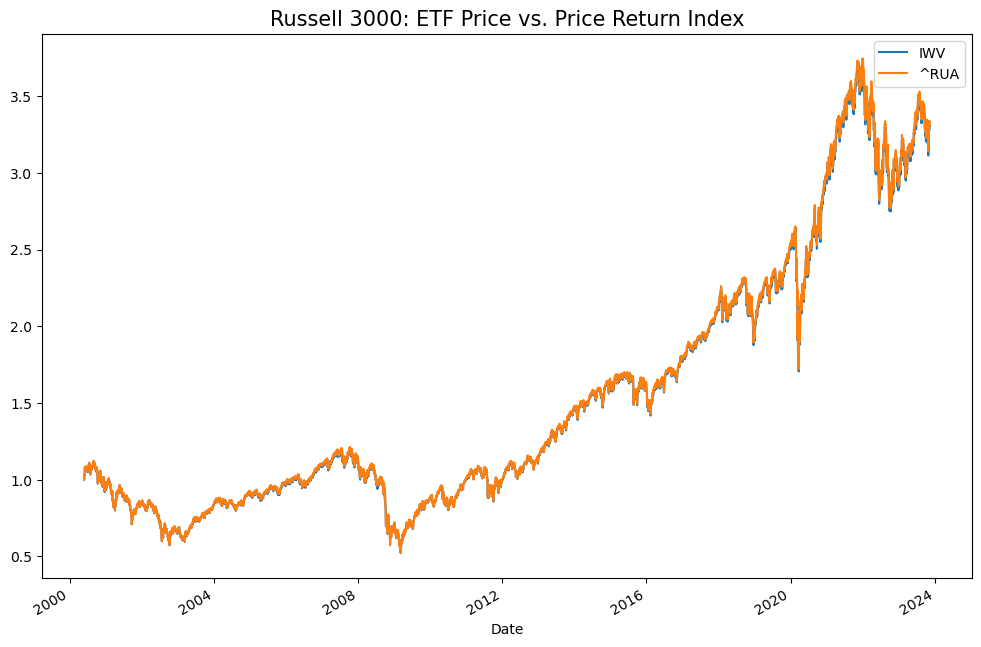

In [68]:
# ETF Price vs. Price Return Index
norm.plot(figsize = (12, 8))
plt.title("Russell 3000: ETF Price vs. Price Return Index", fontsize = 15)
plt.show()

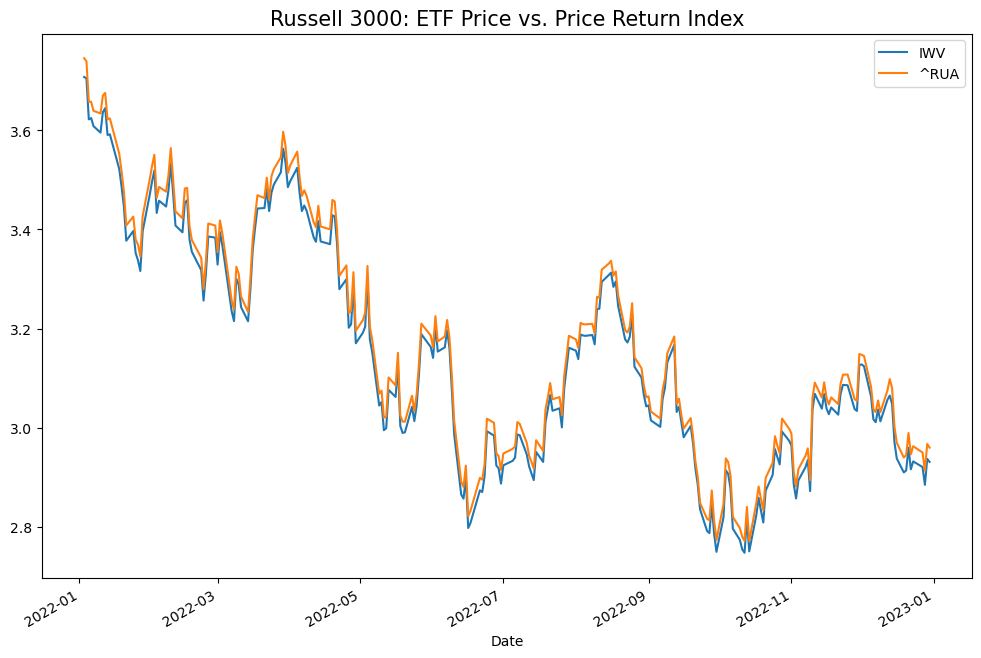

In [69]:
# Zoom into 2022
norm.loc["2022"].plot(figsize = (12, 8))
plt.title("Russell 3000: ETF Price vs. Price Return Index", fontsize = 15)
plt.show()

In [70]:
# Compute the simple return of the Index and the ETF
returns = prices.pct_change()
returns

,IWV,^RUA
Date,,
2000-05-26,NaN,NaN
2000-05-30,0.028643,0.035275
2000-05-31,0.010694,-0.001818
2000-06-01,0.002795,0.022881
2000-06-02,0.031853,0.024037
...,...,...
2023-11-03,0.010906,0.011378
2023-11-06,0.000564,-0.000060
2023-11-07,0.002615,0.002984


In [71]:
# Function for calculate the risk and the return 
def ann_risk_return(returns_df): # assumes simple returns as input
   
    summary = pd.DataFrame(index = returns_df.columns)
   
    # Compute the annualize risk (std) 
    summary["ann. Risk"] = returns_df.std() * np.sqrt(252)
    
    # compute compund annualize growth rate
    log_returns = np.log(returns_df + 1)
    summary["CAGR"] = np.exp(log_returns.mean() * 252) - 1
    
    return summary

In [72]:
# We can see that the annualize risk and return of the
# index and the ETF are almost the same. 
summary = ann_risk_return(returns)
summary

# ofcurse, the ETF replicate after the index. 

,ann. Risk,CAGR
IWV,0.197099,0.052333
^RUA,0.199045,0.052697


In [73]:
# Function for calculate the traking err
# (between Index and the ETF)
def tracking(returns_df, index):
    active_returns = returns_df.sub(returns_df[index], axis = "rows")
    summary = pd.DataFrame(index = returns_df.columns)
    summary["TrackingError"] = active_returns.std() * np.sqrt(252)
    log_returns = np.log(active_returns + 1)
    summary["ActiveReturn"] = np.exp(log_returns.mean() * 252) - 1
    return summary

In [74]:
tracking(returns, "^RUA")

# Very low traking error... :)

,TrackingError,ActiveReturn
IWV,0.027232,-0.0011
^RUA,0.000000,0.0000


---

# ETF Trading with the Interactive Brokers (IBKR) API

__Please run the following code only with your Paper Trading Account!!!__

__Check the Regular Trading Hours!!!__

In [75]:
from ib_insync import *
util.startLoop() 

In [76]:
ib = IB()

In [77]:
ib.connect()

<IB connected to 127.0.0.1:7497 clientId=1>

In [78]:
# SP ETF
symbol = "SPY" #SPDR® S&P 500

In [79]:
contract = Stock(symbol, "SMART", "USD")
contract

Stock(symbol='SPY', exchange='SMART', currency='USD')

In [80]:
cds = ib.reqContractDetails(contract)
cds

[ContractDetails(contract=Contract(secType='STK', conId=756733, symbol='SPY', exchange='SMART', primaryExchange='ARCA', currency='USD', localSymbol='SPY', tradingClass='SPY'), marketName='SPY', minTick=0.01, orderTypes='ACTIVETIM,AD,ADJUST,ALERT,ALGO,ALLOC,AON,AVGCOST,BASKET,BENCHPX,CASHQTY,COND,CONDORDER,DARKONLY,DARKPOLL,DAY,DEACT,DEACTDIS,DEACTEOD,DIS,DUR,GAT,GTC,GTD,GTT,HID,IBKRATS,ICE,IOC,LIT,LMT,LOC,MIDPX,MIT,MKT,MOC,MTL,NGCOMB,NODARK,NONALGO,OCA,OPG,OPGREROUT,PEGBENCH,PEGMID,POSTATS,POSTONLY,PREOPGRTH,PRICECHK,REL,REL2MID,RELPCTOFS,RTH,SCALE,SCALEODD,SCALERST,SIZECHK,SMARTSTG,SNAPMID,SNAPMKT,SNAPREL,STP,STPLMT,SWEEP,TRAIL,TRAILLIT,TRAILLMT,TRAILMIT,WHATIF', validExchanges='SMART,AMEX,NYSE,CBOE,PHLX,ISE,CHX,ARCA,ISLAND,DRCTEDGE,BEX,BATS,EDGEA,JEFFALGO,BYX,IEX,EDGX,FOXRIVER,PEARL,NYSENAT,LTSE,MEMX,IBEOS,OVERNIGHT,PSX', priceMagnifier=1, underConId=0, longName='SPDR S&P 500 ETF TRUST', contractMonth='', industry='', category='', subcategory='', timeZoneId='US/Eastern', tradingHours

In [81]:
len(cds)

1

In [82]:
ib.qualifyContracts(contract)

[Stock(conId=756733, symbol='SPY', exchange='SMART', primaryExchange='ARCA', currency='USD', localSymbol='SPY', tradingClass='SPY')]

In [90]:
data = ib.reqMktData(contract)
data

Ticker(contract=Stock(conId=756733, symbol='SPY', exchange='SMART', primaryExchange='ARCA', currency='USD', localSymbol='SPY', tradingClass='SPY'))

In [91]:
ib.reqMarketDataType(3)

In [92]:
data.marketPrice()

435.72

In [93]:
order = MarketOrder(action = "BUY", totalQuantity = 1)
order

MarketOrder(action='BUY', totalQuantity=1)

In [94]:
trade = ib.placeOrder(contract, order)
while not trade.isDone():
    ib.waitOnUpdate()

In [95]:
trade

Trade(contract=Stock(conId=756733, symbol='SPY', exchange='SMART', primaryExchange='ARCA', currency='USD', localSymbol='SPY', tradingClass='SPY'), order=MarketOrder(orderId=97, clientId=1, permId=1429325155, action='BUY', totalQuantity=1.0, lmtPrice=435.73, auxPrice=0.0), orderStatus=OrderStatus(orderId=97, status='Filled', filled=1.0, remaining=0.0, avgFillPrice=435.68, permId=1429325155, parentId=0, lastFillPrice=435.68, clientId=1, whyHeld='', mktCapPrice=0.0), fills=[Fill(contract=Stock(conId=756733, symbol='SPY', exchange='SMART', primaryExchange='ARCA', currency='USD', localSymbol='SPY', tradingClass='SPY'), execution=Execution(execId='00012ec5.654dc684.01.01', time=datetime.datetime(2023, 11, 10, 14, 15, 28, tzinfo=datetime.timezone.utc), acctNumber='DU8048713', exchange='ISLAND', side='BOT', shares=1.0, price=435.68, permId=1429325155, clientId=1, orderId=97, liquidation=0, cumQty=1.0, avgPrice=435.68, orderRef='', evRule='', evMultiplier=0.0, modelCode='', lastLiquidity=2), co

In [96]:
trade.orderStatus.status

'Filled'

In [97]:
trade.orderStatus.avgFillPrice

435.68

In [98]:
pos = ib.positions()
pos

[Position(account='DU8048713', contract=Stock(conId=756733, symbol='SPY', exchange='ARCA', currency='USD', localSymbol='SPY', tradingClass='SPY'), position=1.0, avgCost=436.68)]

In [99]:
df = util.df(pos)
df

,account,contract,position,avgCost
0,DU8048713,"Stock(conId=756733, symbol='SPY', exchange='AR...",1.0,436.68


In [100]:
df["symbol"] = df.contract.apply(lambda x: x.symbol)
df["conID"] = df.contract.apply(lambda x: x.conId)
df

,account,contract,position,avgCost,symbol,conID
0,DU8048713,"Stock(conId=756733, symbol='SPY', exchange='AR...",1.0,436.68,SPY,756733


In [101]:
ib.disconnect()

---

# Index Tracking with Optimization (Part 1) - The S&P 500 Constituents

__Goal__: S&P500 Index Tracking with __Optimization__ <br>
__Data Requirements__: __Historical Prices__ and __Market Caps__ for all 503 Constituents

In [ ]:
import yfinance as yf
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
plt.style.use("seaborn-v0_8")

__List with all 503 Constituents__

In [115]:
url = "https://en.wikipedia.org/wiki/List_of_S%26P_500_companies"

In [116]:
df = pd.read_html(url)[0]
df

,Symbol,Security,GICS Sector,GICS Sub-Industry,Headquarters Location,Date added,CIK,Founded
0,MMM,3M,Industrials,Industrial Conglomerates,"Saint Paul, Minnesota",1957-03-04,66740,1902
1,AOS,A. O. Smith,Industrials,Building Products,"Milwaukee, Wisconsin",2017-07-26,91142,1916
2,ABT,Abbott,Health Care,Health Care Equipment,"North Chicago, Illinois",1957-03-04,1800,1888
3,ABBV,AbbVie,Health Care,Pharmaceuticals,"North Chicago, Illinois",2012-12-31,1551152,2013 (1888)
4,ACN,Accenture,Information Technology,IT Consulting & Other Services,"Dublin, Ireland",2011-07-06,1467373,1989
...,...,...,...,...,...,...,...,...
498,YUM,Yum! Brands,Consumer Discretionary,Restaurants,"Louisville, Kentucky",1997-10-06,1041061,1997
499,ZBRA,Zebra Technologies,Information Technology,Electronic Equipment & Instruments,"Lincolnshire, Illinois",2019-12-23,877212,1969
500,ZBH,Zimmer Biomet,Health Care,Health Care Equipment,"Warsaw, Indiana",2001-08-07,1136869,1927
501,ZION,Zions Bancorporation,Financials,Regional Banks,"Salt Lake City, Utah",2001-06-22,109380,1873


In [118]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 503 entries, 0 to 502
Data columns (total 8 columns):
 #   Column                 Non-Null Count  Dtype 
---  ------                 --------------  ----- 
 0   Symbol                 503 non-null    object
 1   Security               503 non-null    object
 2   GICS Sector            503 non-null    object
 3   GICS Sub-Industry      503 non-null    object
 4   Headquarters Location  503 non-null    object
 5   Date added             493 non-null    object
 6   CIK                    503 non-null    int64 
 7   Founded                503 non-null    object
dtypes: int64(1), object(7)
memory usage: 31.6+ KB


In [126]:
df.rename(columns = {"Date first added":"Date_Added"}, inplace = True)

In [128]:

# Ensure that the renaming operation was successful
df.rename(columns={"Date first added": "Date_Added"}, inplace=True)

# Verify the column names again
print(df.columns)

Index(['Symbol', 'Security', 'GICS Sector', 'GICS Sub-Industry',
       'Headquarters Location', 'Date added', 'CIK', 'Founded'],
      dtype='object')


In [130]:
df["Date added"] = pd.to_datetime(df["Date added"], errors = "coerce")

In [131]:
# Check the most recent additions to the index. (index reconstitutions)
df["Date added"].sort_values(ascending = False).head(50)

296   2023-10-18
242   2023-10-18
468   2023-10-02
69    2023-09-18
11    2023-09-18
273   2023-08-25
362   2023-06-20
55    2023-05-04
193   2023-03-20
81    2023-03-15
253   2023-03-15
213   2023-01-04
428   2022-12-22
198   2022-12-19
45    2022-11-01
438   2022-10-12
176   2022-10-03
371   2022-10-03
262   2022-09-19
133   2022-09-19
274   2022-06-21
356   2022-06-21
475   2022-06-08
481   2022-04-11
85    2022-04-04
323   2022-03-02
342   2022-02-15
128   2022-02-02
422   2021-12-20
192   2021-12-20
175   2021-12-14
307   2021-09-20
101   2021-09-20
79    2021-09-20
66    2021-08-30
321   2021-07-21
103   2021-05-14
386   2021-04-20
215   2021-03-22
351   2021-03-22
84    2021-03-22
326   2021-02-12
453   2021-01-21
172   2021-01-07
444   2020-12-21
377   2020-10-07
182   2020-09-21
92    2020-09-21
443   2020-09-21
65    2020-06-22
Name: Date added, dtype: datetime64[ns]

In [ ]:
symbols = list(df.Symbol)
symbols

In [133]:
# Take all the symbols of sp500
symbols = [symbol.replace(".", "-") for symbol in symbols]
symbols

['MMM',
 'AOS',
 'ABT',
 'ABBV',
 'ACN',
 'ADM',
 'ADBE',
 'ADP',
 'AES',
 'AFL',
 'A',
 'ABNB',
 'APD',
 'AKAM',
 'ALK',
 'ALB',
 'ARE',
 'ALGN',
 'ALLE',
 'LNT',
 'ALL',
 'GOOGL',
 'GOOG',
 'MO',
 'AMZN',
 'AMCR',
 'AMD',
 'AEE',
 'AAL',
 'AEP',
 'AXP',
 'AIG',
 'AMT',
 'AWK',
 'AMP',
 'AME',
 'AMGN',
 'APH',
 'ADI',
 'ANSS',
 'AON',
 'APA',
 'AAPL',
 'AMAT',
 'APTV',
 'ACGL',
 'ANET',
 'AJG',
 'AIZ',
 'T',
 'ATO',
 'ADSK',
 'AZO',
 'AVB',
 'AVY',
 'AXON',
 'BKR',
 'BALL',
 'BAC',
 'BBWI',
 'BAX',
 'BDX',
 'WRB',
 'BRK-B',
 'BBY',
 'BIO',
 'TECH',
 'BIIB',
 'BLK',
 'BX',
 'BK',
 'BA',
 'BKNG',
 'BWA',
 'BXP',
 'BSX',
 'BMY',
 'AVGO',
 'BR',
 'BRO',
 'BF-B',
 'BG',
 'CHRW',
 'CDNS',
 'CZR',
 'CPT',
 'CPB',
 'COF',
 'CAH',
 'KMX',
 'CCL',
 'CARR',
 'CTLT',
 'CAT',
 'CBOE',
 'CBRE',
 'CDW',
 'CE',
 'COR',
 'CNC',
 'CNP',
 'CDAY',
 'CF',
 'CRL',
 'SCHW',
 'CHTR',
 'CVX',
 'CMG',
 'CB',
 'CHD',
 'CI',
 'CINF',
 'CTAS',
 'CSCO',
 'C',
 'CFG',
 'CLX',
 'CME',
 'CMS',
 'KO',
 'CTSH',
 'CL',


In [134]:
symbols.append("^GSPC")

In [135]:
symbols

['MMM',
 'AOS',
 'ABT',
 'ABBV',
 'ACN',
 'ADM',
 'ADBE',
 'ADP',
 'AES',
 'AFL',
 'A',
 'ABNB',
 'APD',
 'AKAM',
 'ALK',
 'ALB',
 'ARE',
 'ALGN',
 'ALLE',
 'LNT',
 'ALL',
 'GOOGL',
 'GOOG',
 'MO',
 'AMZN',
 'AMCR',
 'AMD',
 'AEE',
 'AAL',
 'AEP',
 'AXP',
 'AIG',
 'AMT',
 'AWK',
 'AMP',
 'AME',
 'AMGN',
 'APH',
 'ADI',
 'ANSS',
 'AON',
 'APA',
 'AAPL',
 'AMAT',
 'APTV',
 'ACGL',
 'ANET',
 'AJG',
 'AIZ',
 'T',
 'ATO',
 'ADSK',
 'AZO',
 'AVB',
 'AVY',
 'AXON',
 'BKR',
 'BALL',
 'BAC',
 'BBWI',
 'BAX',
 'BDX',
 'WRB',
 'BRK-B',
 'BBY',
 'BIO',
 'TECH',
 'BIIB',
 'BLK',
 'BX',
 'BK',
 'BA',
 'BKNG',
 'BWA',
 'BXP',
 'BSX',
 'BMY',
 'AVGO',
 'BR',
 'BRO',
 'BF-B',
 'BG',
 'CHRW',
 'CDNS',
 'CZR',
 'CPT',
 'CPB',
 'COF',
 'CAH',
 'KMX',
 'CCL',
 'CARR',
 'CTLT',
 'CAT',
 'CBOE',
 'CBRE',
 'CDW',
 'CE',
 'COR',
 'CNC',
 'CNP',
 'CDAY',
 'CF',
 'CRL',
 'SCHW',
 'CHTR',
 'CVX',
 'CMG',
 'CB',
 'CHD',
 'CI',
 'CINF',
 'CTAS',
 'CSCO',
 'C',
 'CFG',
 'CLX',
 'CME',
 'CMS',
 'KO',
 'CTSH',
 'CL',


__Historical Prices__

In [136]:
# Download the historical price of all the instuments in SP-500
df = yf.download(symbols)
df

[*********************100%%**********************]  504 of 504 completed


Adj Close                                                        \
                     A    AAL        AAPL        ABBV        ABNB        ABT   
Date                                                                           
1927-12-30         NaN    NaN         NaN         NaN         NaN        NaN   
1928-01-03         NaN    NaN         NaN         NaN         NaN        NaN   
1928-01-04         NaN    NaN         NaN         NaN         NaN        NaN   
1928-01-05         NaN    NaN         NaN         NaN         NaN        NaN   
1928-01-06         NaN    NaN         NaN         NaN         NaN        NaN   
...                ...    ...         ...         ...         ...        ...   
2023-11-03  109.019997  11.98  176.649994  141.419998  122.639999  95.839996   
2023-11-06  107.529999  11.66  179.229996  141.199997  118.169998  95.000000   
2023-11-07  110.540001  11.75  181.820007  142.160004  121.080002  94.800003   
2023-11-08  109.389999  12.01  182.889999  142.029999  117.660004  94.739998   
2023-11-09  107.739998  11.75  182.410004  138.039993  115.519997  93.550003   

                                                           ...     Volume  \
                 ACGL         ACN        ADBE         ADI  ...        XEL   
Date                                                       ...              
1927-12-30        NaN         NaN         NaN         NaN  ...        NaN   
1928-01-03        NaN         NaN         NaN         NaN  ...        NaN   
1928-01-04        NaN         NaN         NaN         NaN  ...        NaN   
1928-01-05        NaN         NaN         NaN         NaN  ...        NaN   
1928-01-06        NaN         NaN         NaN         NaN  ...        NaN   
...               ...         ...         ...         ...  ...        ...   
2023-11-03  85.550003  313.489990  563.659973  167.919998  ...  3920600.0   
2023-11-06  85.160004  313.089996  565.450012  167.570007  ...  3139700.0   
2023-11-07  85.410004  315.190002  585.200012  168.110001  ...  3515300.0   
2023-11-08  84.120003  317.820007  585.309998  168.910004  ...  3953300.0   
2023-11-09  84.669998  314.220001  577.739990  167.130005  ...  3871700.0   

                                                                              \
                   XOM       XRAY        XYL        YUM        ZBH      ZBRA   
Date                                                                           
1927-12-30         NaN        NaN        NaN        NaN        NaN       NaN   
1928-01-03         NaN        NaN        NaN        NaN        NaN       NaN   
1928-01-04         NaN        NaN        NaN        NaN        NaN       NaN   
1928-01-05         NaN        NaN        NaN        NaN        NaN       NaN   
1928-01-06         NaN        NaN        NaN        NaN        NaN       NaN   
...                ...        ...        ...        ...        ...       ...   
2023-11-03  30549000.0  5097400.0  1852500.0  1754600.0  2140100.0  540800.0   
2023-11-06  19097300.0  4935000.0  1324300.0  1537900.0  2443700.0  373800.0   
2023-11-07  20272500.0  3418500.0  1385100.0  1408000.0  2699200.0  613300.0   
2023-11-08  19184100.0  3766000.0  1062400.0  1015300.0  1524700.0  525900.0   
2023-11-09  18375300.0  5385300.0  1533100.0  1096900.0  1729100.0  486600.0   

                                              
                 ZION        ZTS       ^GSPC  
Date                                          
1927-12-30        NaN        NaN           0  
1928-01-03        NaN        NaN           0  
1928-01-04        NaN        NaN           0  
1928-01-05        NaN        NaN           0  
1928-01-06        NaN        NaN           0  
...               ...        ...         ...  
2023-11-03  2598900.0  1974700.0  4570960000  
2023-11-06  1551900.0  2112500.0  3656340000  
2023-11-07  1763500.0  2938200.0  3791230000  
2023-11-08  1755000.0  3326300.0  3729510000  
2023-11-09  1875000.0  3479300.0  3900780000  

[24081 rows x 3024 columns]

In [ ]:
# take the historical data since 2019
df = df.loc["2019":].copy()
df

In [138]:
# df.to_csv("SP500_Const.csv")

In [139]:
const = pd.read_csv("SP500_Const.csv", header =[0,1], index_col = 0, parse_dates = [0])
const

Adj Close                                                        \
                     A    AAL        AAPL        ABBV        ABNB        ABT   
Date                                                                           
1927-12-30         NaN    NaN         NaN         NaN         NaN        NaN   
1928-01-03         NaN    NaN         NaN         NaN         NaN        NaN   
1928-01-04         NaN    NaN         NaN         NaN         NaN        NaN   
1928-01-05         NaN    NaN         NaN         NaN         NaN        NaN   
1928-01-06         NaN    NaN         NaN         NaN         NaN        NaN   
...                ...    ...         ...         ...         ...        ...   
2023-11-03  109.019997  11.98  176.649994  141.419998  122.639999  95.839996   
2023-11-06  107.529999  11.66  179.229996  141.199997  118.169998  95.000000   
2023-11-07  110.540001  11.75  181.820007  142.160004  121.080002  94.800003   
2023-11-08  109.389999  12.01  182.889999  142.029999  117.660004  94.739998   
2023-11-09  107.739998  11.75  182.410004  138.039993  115.519997  93.550003   

                                                           ...     Volume  \
                 ACGL         ACN        ADBE         ADI  ...        XEL   
Date                                                       ...              
1927-12-30        NaN         NaN         NaN         NaN  ...        NaN   
1928-01-03        NaN         NaN         NaN         NaN  ...        NaN   
1928-01-04        NaN         NaN         NaN         NaN  ...        NaN   
1928-01-05        NaN         NaN         NaN         NaN  ...        NaN   
1928-01-06        NaN         NaN         NaN         NaN  ...        NaN   
...               ...         ...         ...         ...  ...        ...   
2023-11-03  85.550003  313.489990  563.659973  167.919998  ...  3920600.0   
2023-11-06  85.160004  313.089996  565.450012  167.570007  ...  3139700.0   
2023-11-07  85.410004  315.190002  585.200012  168.110001  ...  3515300.0   
2023-11-08  84.120003  317.820007  585.309998  168.910004  ...  3953300.0   
2023-11-09  84.669998  314.220001  577.739990  167.130005  ...  3871700.0   

                                                                              \
                   XOM       XRAY        XYL        YUM        ZBH      ZBRA   
Date                                                                           
1927-12-30         NaN        NaN        NaN        NaN        NaN       NaN   
1928-01-03         NaN        NaN        NaN        NaN        NaN       NaN   
1928-01-04         NaN        NaN        NaN        NaN        NaN       NaN   
1928-01-05         NaN        NaN        NaN        NaN        NaN       NaN   
1928-01-06         NaN        NaN        NaN        NaN        NaN       NaN   
...                ...        ...        ...        ...        ...       ...   
2023-11-03  30549000.0  5097400.0  1852500.0  1754600.0  2140100.0  540800.0   
2023-11-06  19097300.0  4935000.0  1324300.0  1537900.0  2443700.0  373800.0   
2023-11-07  20272500.0  3418500.0  1385100.0  1408000.0  2699200.0  613300.0   
2023-11-08  19184100.0  3766000.0  1062400.0  1015300.0  1524700.0  525900.0   
2023-11-09  18375300.0  5385300.0  1533100.0  1096900.0  1729100.0  486600.0   

                                              
                 ZION        ZTS       ^GSPC  
Date                                          
1927-12-30        NaN        NaN           0  
1928-01-03        NaN        NaN           0  
1928-01-04        NaN        NaN           0  
1928-01-05        NaN        NaN           0  
1928-01-06        NaN        NaN           0  
...               ...        ...         ...  
2023-11-03  2598900.0  1974700.0  4570960000  
2023-11-06  1551900.0  2112500.0  3656340000  
2023-11-07  1763500.0  2938200.0  3791230000  
2023-11-08  1755000.0  3326300.0  3729510000  
2023-11-09  1875000.0  3479300.0  3900780000  

[24081 rows x 3024 columns]

__Data Cleaning and Preparation__

In [140]:
# The close price, since 2019.
close = const.loc["2019":, "Close"]
close

,A,AAL,AAPL,ABBV,ABNB,ABT,ACGL,ACN,ADBE,ADI,...,XEL,XOM,XRAY,XYL,YUM,ZBH,ZBRA,ZION,ZTS,^GSPC
Date,,,,,,,,,,,,,,,,,,,,,
2019-01-02,65.690002,32.480000,39.480000,89.230003,NaN,69.500000,26.190001,140.589996,224.570007,85.919998,...,48.220001,69.690002,37.889999,66.510002,91.440002,99.300972,156.240005,41.580002,84.480003,2510.030029
2019-01-03,63.270000,30.059999,35.547501,86.290001,NaN,66.220001,25.780001,135.789993,215.699997,80.730003,...,48.029999,68.620003,37.910000,64.230003,89.139999,97.504852,146.880005,41.349998,81.559998,2447.889893
2019-01-04,65.459999,32.040001,37.064999,89.070000,NaN,68.110001,26.389999,141.070007,226.190002,82.690002,...,48.500000,71.150002,39.009998,66.940002,91.459999,100.834953,152.970001,42.619999,84.760002,2531.939941
2019-01-07,66.849998,32.950001,36.982498,90.370003,NaN,69.129997,26.330000,141.559998,229.259995,83.209999,...,48.290001,71.519997,39.709999,65.949997,91.360001,100.873787,155.289993,42.790001,85.269997,2549.689941
2019-01-08,67.830002,32.419998,37.687500,90.790001,NaN,68.300003,26.430000,145.139999,232.679993,85.239998,...,48.849998,72.040001,39.439999,66.570000,91.180000,98.611649,156.330002,43.180000,86.540001,2574.409912
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
2023-11-03,109.019997,11.980000,176.649994,141.419998,122.639999,95.839996,85.550003,313.489990,563.659973,167.919998,...,61.029999,107.779999,29.209999,96.930000,126.339996,108.750000,214.300003,34.759998,162.229996,4358.339844
2023-11-06,107.529999,11.660000,179.229996,141.199997,118.169998,95.000000,85.160004,313.089996,565.450012,167.570007,...,60.560001,105.870003,28.559999,96.160004,126.389999,109.300003,206.020004,34.180000,163.169998,4365.979980
2023-11-07,110.540001,11.750000,181.820007,142.160004,121.080002,94.800003,85.410004,315.190002,585.200012,168.110001,...,59.830002,104.209999,28.400000,96.769997,125.480003,105.930000,208.039993,34.099998,167.160004,4378.379883


In [141]:
close.isna().sum().sort_values().value_counts()

0       493
305       2
47        1
48        1
53        1
99        1
490       1
768       1
997       1
1092      1
1197      1
Name: count, dtype: int64

In [142]:
# only [1] NA per Symbol allowed (thresh = threshold)
close.dropna(axis = 1, thresh = len(close) - 1, inplace = True)
close

,A,AAL,AAPL,ABBV,ABT,ACGL,ACN,ADBE,ADI,ADM,...,XEL,XOM,XRAY,XYL,YUM,ZBH,ZBRA,ZION,ZTS,^GSPC
Date,,,,,,,,,,,,,,,,,,,,,
2019-01-02,65.690002,32.480000,39.480000,89.230003,69.500000,26.190001,140.589996,224.570007,85.919998,40.950001,...,48.220001,69.690002,37.889999,66.510002,91.440002,99.300972,156.240005,41.580002,84.480003,2510.030029
2019-01-03,63.270000,30.059999,35.547501,86.290001,66.220001,25.780001,135.789993,215.699997,80.730003,40.770000,...,48.029999,68.620003,37.910000,64.230003,89.139999,97.504852,146.880005,41.349998,81.559998,2447.889893
2019-01-04,65.459999,32.040001,37.064999,89.070000,68.110001,26.389999,141.070007,226.190002,82.690002,41.709999,...,48.500000,71.150002,39.009998,66.940002,91.459999,100.834953,152.970001,42.619999,84.760002,2531.939941
2019-01-07,66.849998,32.950001,36.982498,90.370003,69.129997,26.330000,141.559998,229.259995,83.209999,41.919998,...,48.290001,71.519997,39.709999,65.949997,91.360001,100.873787,155.289993,42.790001,85.269997,2549.689941
2019-01-08,67.830002,32.419998,37.687500,90.790001,68.300003,26.430000,145.139999,232.679993,85.239998,42.700001,...,48.849998,72.040001,39.439999,66.570000,91.180000,98.611649,156.330002,43.180000,86.540001,2574.409912
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
2023-11-03,109.019997,11.980000,176.649994,141.419998,95.839996,85.550003,313.489990,563.659973,167.919998,72.910004,...,61.029999,107.779999,29.209999,96.930000,126.339996,108.750000,214.300003,34.759998,162.229996,4358.339844
2023-11-06,107.529999,11.660000,179.229996,141.199997,95.000000,85.160004,313.089996,565.450012,167.570007,72.559998,...,60.560001,105.870003,28.559999,96.160004,126.389999,109.300003,206.020004,34.180000,163.169998,4365.979980
2023-11-07,110.540001,11.750000,181.820007,142.160004,94.800003,85.410004,315.190002,585.200012,168.110001,72.110001,...,59.830002,104.209999,28.400000,96.769997,125.480003,105.930000,208.039993,34.099998,167.160004,4378.379883


In [143]:
# Forward fill
close.fillna(method = "ffill", inplace = True)
close

C:\Users\97250\AppData\Local\Temp\ipykernel_30068\4207931223.py:1: FutureWarning: DataFrame.fillna with 'method' is deprecated and will raise in a future version. Use obj.ffill() or obj.bfill() instead.
  close.fillna(method = "ffill", inplace = True)


,A,AAL,AAPL,ABBV,ABT,ACGL,ACN,ADBE,ADI,ADM,...,XEL,XOM,XRAY,XYL,YUM,ZBH,ZBRA,ZION,ZTS,^GSPC
Date,,,,,,,,,,,,,,,,,,,,,
2019-01-02,65.690002,32.480000,39.480000,89.230003,69.500000,26.190001,140.589996,224.570007,85.919998,40.950001,...,48.220001,69.690002,37.889999,66.510002,91.440002,99.300972,156.240005,41.580002,84.480003,2510.030029
2019-01-03,63.270000,30.059999,35.547501,86.290001,66.220001,25.780001,135.789993,215.699997,80.730003,40.770000,...,48.029999,68.620003,37.910000,64.230003,89.139999,97.504852,146.880005,41.349998,81.559998,2447.889893
2019-01-04,65.459999,32.040001,37.064999,89.070000,68.110001,26.389999,141.070007,226.190002,82.690002,41.709999,...,48.500000,71.150002,39.009998,66.940002,91.459999,100.834953,152.970001,42.619999,84.760002,2531.939941
2019-01-07,66.849998,32.950001,36.982498,90.370003,69.129997,26.330000,141.559998,229.259995,83.209999,41.919998,...,48.290001,71.519997,39.709999,65.949997,91.360001,100.873787,155.289993,42.790001,85.269997,2549.689941
2019-01-08,67.830002,32.419998,37.687500,90.790001,68.300003,26.430000,145.139999,232.679993,85.239998,42.700001,...,48.849998,72.040001,39.439999,66.570000,91.180000,98.611649,156.330002,43.180000,86.540001,2574.409912
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
2023-11-03,109.019997,11.980000,176.649994,141.419998,95.839996,85.550003,313.489990,563.659973,167.919998,72.910004,...,61.029999,107.779999,29.209999,96.930000,126.339996,108.750000,214.300003,34.759998,162.229996,4358.339844
2023-11-06,107.529999,11.660000,179.229996,141.199997,95.000000,85.160004,313.089996,565.450012,167.570007,72.559998,...,60.560001,105.870003,28.559999,96.160004,126.389999,109.300003,206.020004,34.180000,163.169998,4365.979980
2023-11-07,110.540001,11.750000,181.820007,142.160004,94.800003,85.410004,315.190002,585.200012,168.110001,72.110001,...,59.830002,104.209999,28.400000,96.769997,125.480003,105.930000,208.039993,34.099998,167.160004,4378.379883


In [144]:
# Checl if therer is missing values
close.isna().sum().sort_values().value_counts()

0    493
Name: count, dtype: int64

In [145]:
index = "^GSPC"

In [146]:
const = close.columns.drop([index])
const

Index(['A', 'AAL', 'AAPL', 'ABBV', 'ABT', 'ACGL', 'ACN', 'ADBE', 'ADI', 'ADM',
       ...
       'WYNN', 'XEL', 'XOM', 'XRAY', 'XYL', 'YUM', 'ZBH', 'ZBRA', 'ZION',
       'ZTS'],
      dtype='object', length=492)

In [147]:
# normalize 
norm = close.div(close.iloc[0])
norm

,A,AAL,AAPL,ABBV,ABT,ACGL,ACN,ADBE,ADI,ADM,...,XEL,XOM,XRAY,XYL,YUM,ZBH,ZBRA,ZION,ZTS,^GSPC
Date,,,,,,,,,,,,,,,,,,,,,
2019-01-02,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,...,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000
2019-01-03,0.963160,0.925493,0.900393,0.967051,0.952806,0.984345,0.965858,0.960502,0.939595,0.995604,...,0.996060,0.984646,1.000528,0.965719,0.974847,0.981912,0.940092,0.994468,0.965436,0.975243
2019-01-04,0.996499,0.986453,0.938830,0.998207,0.980000,1.007636,1.003414,1.007214,0.962407,1.018559,...,1.005807,1.020950,1.029559,1.006465,1.000219,1.015448,0.979071,1.025012,1.003314,1.008729
2019-01-07,1.017659,1.014470,0.936740,1.012776,0.994676,1.005346,1.006900,1.020884,0.968459,1.023687,...,1.001452,1.026259,1.048034,0.991580,0.999125,1.015839,0.993920,1.029101,1.009351,1.015801
2019-01-08,1.032577,0.998153,0.954597,1.017483,0.982734,1.009164,1.032364,1.036113,0.992086,1.042735,...,1.013065,1.033721,1.040908,1.000902,0.997157,0.993058,1.000576,1.038480,1.024384,1.025649
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
2023-11-03,1.659613,0.368842,4.474417,1.584893,1.378993,3.266514,2.229817,2.509952,1.954376,1.780464,...,1.265657,1.546563,0.770916,1.457375,1.381671,1.095155,1.371608,0.835979,1.920336,1.736370
2023-11-06,1.636931,0.358990,4.539767,1.582427,1.366906,3.251623,2.226972,2.517923,1.950303,1.771917,...,1.255910,1.519156,0.753761,1.445798,1.382218,1.100694,1.318612,0.822030,1.931463,1.739413
2023-11-07,1.682752,0.361761,4.605370,1.593186,1.364029,3.261168,2.241909,2.605869,1.956588,1.760928,...,1.240771,1.495336,0.749538,1.454969,1.372266,1.066757,1.331541,0.820106,1.978693,1.744354


In [148]:
returns = close.pct_change()
returns

,A,AAL,AAPL,ABBV,ABT,ACGL,ACN,ADBE,ADI,ADM,...,XEL,XOM,XRAY,XYL,YUM,ZBH,ZBRA,ZION,ZTS,^GSPC
Date,,,,,,,,,,,,,,,,,,,,,
2019-01-02,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
2019-01-03,-0.036840,-0.074507,-0.099607,-0.032949,-0.047194,-0.015655,-0.034142,-0.039498,-0.060405,-0.004396,...,-0.003940,-0.015354,0.000528,-0.034281,-0.025153,-0.018088,-0.059908,-0.005532,-0.034564,-0.024757
2019-01-04,0.034614,0.065868,0.042689,0.032217,0.028541,0.023662,0.038884,0.048632,0.024278,0.023056,...,0.009786,0.036870,0.029016,0.042192,0.026026,0.034153,0.041462,0.030713,0.039235,0.034336
2019-01-07,0.021234,0.028402,-0.002226,0.014595,0.014976,-0.002274,0.003473,0.013573,0.006289,0.005035,...,-0.004330,0.005200,0.017944,-0.014789,-0.001093,0.000385,0.015166,0.003989,0.006017,0.007010
2019-01-08,0.014660,-0.016085,0.019063,0.004648,-0.012006,0.003798,0.025290,0.014918,0.024396,0.018607,...,0.011597,0.007271,-0.006799,0.009401,-0.001970,-0.022425,0.006697,0.009114,0.014894,0.009695
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
2023-11-03,0.043553,0.050877,-0.005181,-0.012844,-0.001251,-0.004538,0.017428,0.008860,0.021784,0.006766,...,-0.000655,-0.012190,0.023476,0.027781,0.016657,-0.013158,0.035266,0.046043,0.008203,0.009394
2023-11-06,-0.013667,-0.026711,0.014605,-0.001556,-0.008765,-0.004559,-0.001276,0.003176,-0.002084,-0.004801,...,-0.007701,-0.017721,-0.022253,-0.007944,0.000396,0.005057,-0.038637,-0.016686,0.005794,0.001753
2023-11-07,0.027992,0.007719,0.014451,0.006799,-0.002105,0.002936,0.006707,0.034928,0.003222,-0.006202,...,-0.012054,-0.015680,-0.005602,0.006344,-0.007200,-0.030833,0.009805,-0.002341,0.024453,0.002840


---

# Index Tracking with Optimization (Part 2) - Historical Market Caps

__All US Listings__ (taken from https://www.nasdaq.com/market-activity/stocks/screener) 

In [181]:
listings = pd.read_csv("nasdaq_listings.csv", index_col = "Symbol")
listings

,Name,Last Sale,Net Change,% Change,Market Cap,Country,IPO Year,Volume,Sector,Industry
Symbol,,,,,,,,,,
A,Agilent Technologies Inc. Common Stock,$156.86,11.7200,8.08%,4.643692e+10,United States,1999.0,3512521,Industrials,Electrical Products
AA,Alcoa Corporation Common Stock,$49.36,2.7300,5.86%,8.733618e+09,NaN,2016.0,5592225,Industrials,Metal Fabrications
AAC,Ares Acquisition Corporation Class A Ordinary ...,$10.005,0.0050,0.05%,1.250625e+09,NaN,2021.0,11399,Finance,Business Services
AACG,ATA Creativity Global American Depositary Shares,$1.68,-0.0200,-1.18%,5.271323e+07,China,2008.0,601,Consumer Discretionary,Service to the Health Industry
AACI,Armada Acquisition Corp. I Common Stock,$9.985,0.0150,0.15%,2.067844e+08,United States,2021.0,83731,Industrials,Consumer Electronics/Appliances
...,...,...,...,...,...,...,...,...,...,...
ZWRKW,Z-Work Acquisition Corp. Warrant,$0.0005,-0.0006,-54.55%,0.000000e+00,United States,2021.0,2014,Industrials,Consumer Electronics/Appliances
ZWS,Zurn Elkay Water Solutions Corporation Common ...,$24.86,1.0000,4.19%,4.419974e+09,United States,2012.0,1257952,Utilities,Environmental Services
ZYME,Zymeworks Inc. Common Shares,$7.76,-0.1900,-2.39%,4.787484e+08,Canada,2022.0,632987,Health Care,Biotechnology: Biological Products (No Diagnos...


In [182]:
listings.index = listings.index.str.replace("/", "-")

In [183]:
# Drop any instruments
missing = ['COR', 'EG', 'FI', 'RVTY']
mask = ~np.isin(const, missing)
const = const[mask]

In [184]:
# get all the sp500 constituens
listings = listings.loc[const].copy()
listings

,Name,Last Sale,Net Change,% Change,Market Cap,Country,IPO Year,Volume,Sector,Industry
A,Agilent Technologies Inc. Common Stock,$156.86,11.72,8.08%,4.643692e+10,United States,1999.0,3512521,Industrials,Electrical Products
AAL,American Airlines Group Inc. Common Stock,$13.98,0.13,0.94%,9.085614e+09,United States,NaN,26355402,Consumer Discretionary,Air Freight/Delivery Services
AAPL,Apple Inc. Common Stock,$150.18,2.17,1.47%,2.603720e+12,United States,1980.0,51718866,Technology,Computer Manufacturing
ABBV,AbbVie Inc. Common Stock,$159.79,2.68,1.71%,2.825860e+11,United States,2012.0,5351108,Health Care,Other Pharmaceuticals
ABT,Abbott Laboratories Common Stock,$104.87,0.99,0.95%,1.828490e+11,United States,NaN,4511154,Health Care,Medical/Dental Instruments
...,...,...,...,...,...,...,...,...,...,...
YUM,Yum! Brands Inc.,$124.94,0.92,0.74%,3.519408e+10,United States,NaN,1506965,Consumer Discretionary,Restaurants
ZBH,Zimmer Biomet Holdings Inc. Common Stock,$115.33,0.80,0.70%,2.420228e+10,United States,NaN,834218,Health Care,Industrial Specialties
ZBRA,Zebra Technologies Corporation Class A Common ...,$261.05,4.05,1.58%,1.347796e+10,United States,1991.0,442103,Technology,Computer peripheral equipment
ZION,Zions Bancorporation N.A. Common Stock,$51.26,0.45,0.89%,7.669406e+09,United States,NaN,981894,Finance,Major Banks


In [185]:
listings.info()

<class 'pandas.core.frame.DataFrame'>
Index: 488 entries, A to ZTS
Data columns (total 10 columns):
 #   Column      Non-Null Count  Dtype  
---  ------      --------------  -----  
 0   Name        488 non-null    object 
 1   Last Sale   488 non-null    object 
 2   Net Change  488 non-null    float64
 3   % Change    488 non-null    object 
 4   Market Cap  487 non-null    float64
 5   Country     475 non-null    object 
 6   IPO Year    168 non-null    float64
 7   Volume      488 non-null    int64  
 8   Sector      478 non-null    object 
 9   Industry    478 non-null    object 
dtypes: float64(3), int64(1), object(6)
memory usage: 41.9+ KB


In [186]:
listings[listings["Market Cap"].isna()]

,Name,Last Sale,Net Change,% Change,Market Cap,Country,IPO Year,Volume,Sector,Industry
BF-B,Brown Forman Corporation,$72.24,1.77,2.51%,NaN,United States,NaN,1062775,NaN,NaN


In [187]:
to_remove = listings[listings["Market Cap"].isna()].index[0]
to_remove

'BF-B'

In [188]:
listings.drop(to_remove, inplace = True)

In [189]:
const

Index(['A', 'AAL', 'AAPL', 'ABBV', 'ABT', 'ACGL', 'ACN', 'ADBE', 'ADI', 'ADM',
       ...
       'WYNN', 'XEL', 'XOM', 'XRAY', 'XYL', 'YUM', 'ZBH', 'ZBRA', 'ZION',
       'ZTS'],
      dtype='object', length=488)

In [190]:
listings

,Name,Last Sale,Net Change,% Change,Market Cap,Country,IPO Year,Volume,Sector,Industry
A,Agilent Technologies Inc. Common Stock,$156.86,11.72,8.08%,4.643692e+10,United States,1999.0,3512521,Industrials,Electrical Products
AAL,American Airlines Group Inc. Common Stock,$13.98,0.13,0.94%,9.085614e+09,United States,NaN,26355402,Consumer Discretionary,Air Freight/Delivery Services
AAPL,Apple Inc. Common Stock,$150.18,2.17,1.47%,2.603720e+12,United States,1980.0,51718866,Technology,Computer Manufacturing
ABBV,AbbVie Inc. Common Stock,$159.79,2.68,1.71%,2.825860e+11,United States,2012.0,5351108,Health Care,Other Pharmaceuticals
ABT,Abbott Laboratories Common Stock,$104.87,0.99,0.95%,1.828490e+11,United States,NaN,4511154,Health Care,Medical/Dental Instruments
...,...,...,...,...,...,...,...,...,...,...
YUM,Yum! Brands Inc.,$124.94,0.92,0.74%,3.519408e+10,United States,NaN,1506965,Consumer Discretionary,Restaurants
ZBH,Zimmer Biomet Holdings Inc. Common Stock,$115.33,0.80,0.70%,2.420228e+10,United States,NaN,834218,Health Care,Industrial Specialties
ZBRA,Zebra Technologies Corporation Class A Common ...,$261.05,4.05,1.58%,1.347796e+10,United States,1991.0,442103,Technology,Computer peripheral equipment
ZION,Zions Bancorporation N.A. Common Stock,$51.26,0.45,0.89%,7.669406e+09,United States,NaN,981894,Finance,Major Banks


In [191]:
# process and convert the price to nummeric data. 
listings["Price"] = pd.to_numeric(listings["Last Sale"].str.replace("$", "", regex = False))
listings 

,Name,Last Sale,Net Change,% Change,Market Cap,Country,IPO Year,Volume,Sector,Industry,Price
A,Agilent Technologies Inc. Common Stock,$156.86,11.72,8.08%,4.643692e+10,United States,1999.0,3512521,Industrials,Electrical Products,156.86
AAL,American Airlines Group Inc. Common Stock,$13.98,0.13,0.94%,9.085614e+09,United States,NaN,26355402,Consumer Discretionary,Air Freight/Delivery Services,13.98
AAPL,Apple Inc. Common Stock,$150.18,2.17,1.47%,2.603720e+12,United States,1980.0,51718866,Technology,Computer Manufacturing,150.18
ABBV,AbbVie Inc. Common Stock,$159.79,2.68,1.71%,2.825860e+11,United States,2012.0,5351108,Health Care,Other Pharmaceuticals,159.79
ABT,Abbott Laboratories Common Stock,$104.87,0.99,0.95%,1.828490e+11,United States,NaN,4511154,Health Care,Medical/Dental Instruments,104.87
...,...,...,...,...,...,...,...,...,...,...,...
YUM,Yum! Brands Inc.,$124.94,0.92,0.74%,3.519408e+10,United States,NaN,1506965,Consumer Discretionary,Restaurants,124.94
ZBH,Zimmer Biomet Holdings Inc. Common Stock,$115.33,0.80,0.70%,2.420228e+10,United States,NaN,834218,Health Care,Industrial Specialties,115.33
ZBRA,Zebra Technologies Corporation Class A Common ...,$261.05,4.05,1.58%,1.347796e+10,United States,1991.0,442103,Technology,Computer peripheral equipment,261.05
ZION,Zions Bancorporation N.A. Common Stock,$51.26,0.45,0.89%,7.669406e+09,United States,NaN,981894,Finance,Major Banks,51.26


In [192]:
# Calculate the number of shares
listings["Shares"] = listings["Market Cap"] / listings.Price
listings

,Name,Last Sale,Net Change,% Change,Market Cap,Country,IPO Year,Volume,Sector,Industry,Price,Shares
A,Agilent Technologies Inc. Common Stock,$156.86,11.72,8.08%,4.643692e+10,United States,1999.0,3512521,Industrials,Electrical Products,156.86,2.960406e+08
AAL,American Airlines Group Inc. Common Stock,$13.98,0.13,0.94%,9.085614e+09,United States,NaN,26355402,Consumer Discretionary,Air Freight/Delivery Services,13.98,6.499009e+08
AAPL,Apple Inc. Common Stock,$150.18,2.17,1.47%,2.603720e+12,United States,1980.0,51718866,Technology,Computer Manufacturing,150.18,1.733733e+10
ABBV,AbbVie Inc. Common Stock,$159.79,2.68,1.71%,2.825860e+11,United States,2012.0,5351108,Health Care,Other Pharmaceuticals,159.79,1.768484e+09
ABT,Abbott Laboratories Common Stock,$104.87,0.99,0.95%,1.828490e+11,United States,NaN,4511154,Health Care,Medical/Dental Instruments,104.87,1.743578e+09
...,...,...,...,...,...,...,...,...,...,...,...,...
YUM,Yum! Brands Inc.,$124.94,0.92,0.74%,3.519408e+10,United States,NaN,1506965,Consumer Discretionary,Restaurants,124.94,2.816879e+08
ZBH,Zimmer Biomet Holdings Inc. Common Stock,$115.33,0.80,0.70%,2.420228e+10,United States,NaN,834218,Health Care,Industrial Specialties,115.33,2.098524e+08
ZBRA,Zebra Technologies Corporation Class A Common ...,$261.05,4.05,1.58%,1.347796e+10,United States,1991.0,442103,Technology,Computer peripheral equipment,261.05,5.162980e+07
ZION,Zions Bancorporation N.A. Common Stock,$51.26,0.45,0.89%,7.669406e+09,United States,NaN,981894,Finance,Major Banks,51.26,1.496178e+08


In [193]:
shares = listings.Shares
shares

A       2.960406e+08
AAL     6.499009e+08
AAPL    1.733733e+10
ABBV    1.768484e+09
ABT     1.743578e+09
            ...     
YUM     2.816879e+08
ZBH     2.098524e+08
ZBRA    5.162980e+07
ZION    1.496178e+08
ZTS     4.660720e+08
Name: Shares, Length: 487, dtype: float64

In [194]:
# Market cap for all the stocks over the time.. 
mcap = close[const].mul(shares) # approximation!
mcap

,A,AAL,AAPL,ABBV,ABT,ACGL,ACN,ADBE,ADI,ADM,...,WYNN,XEL,XOM,XRAY,XYL,YUM,ZBH,ZBRA,ZION,ZTS
Date,,,,,,,,,,,,,,,,,,,,,
2019-01-02,1.944691e+10,2.110878e+10,6.844777e+11,1.578018e+11,1.211787e+11,9.686975e+09,8.858288e+10,1.044025e+11,4.419222e+10,2.249524e+10,...,1.182994e+10,2.638832e+10,2.870040e+11,8.143011e+09,1.198653e+10,2.575754e+10,2.083855e+10,8.066640e+09,6.221106e+09,3.937376e+10
2019-01-03,1.873049e+10,1.953602e+10,6.162987e+11,1.526025e+11,1.154597e+11,9.535327e+09,8.555850e+10,1.002789e+11,4.152279e+10,2.239636e+10,...,1.171549e+10,2.628434e+10,2.825975e+11,8.147310e+09,1.157563e+10,2.510966e+10,2.046163e+10,7.583385e+09,6.186694e+09,3.801283e+10
2019-01-04,1.937882e+10,2.082283e+10,6.426081e+11,1.575188e+11,1.187551e+11,9.760949e+09,8.888533e+10,1.051557e+11,4.253090e+10,2.291273e+10,...,1.218801e+10,2.654155e+10,2.930167e+11,8.383712e+09,1.206403e+10,2.576317e+10,2.116046e+10,7.897810e+09,6.376709e+09,3.950426e+10
2019-01-07,1.979031e+10,2.141423e+10,6.411777e+11,1.598179e+11,1.205335e+11,9.738757e+09,8.919406e+10,1.065829e+11,4.279836e+10,2.302809e+10,...,1.240444e+10,2.642663e+10,2.945405e+11,8.534151e+09,1.188561e+10,2.573500e+10,2.116861e+10,8.017591e+09,6.402144e+09,3.974196e+10
2019-01-08,2.008043e+10,2.106979e+10,6.534006e+11,1.605606e+11,1.190864e+11,9.775744e+09,9.144975e+10,1.081728e+11,4.384247e+10,2.345657e+10,...,1.279310e+10,2.673309e+10,2.966820e+11,8.476124e+09,1.199735e+10,2.568430e+10,2.069389e+10,8.071286e+09,6.460495e+09,4.033387e+10
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
2023-11-03,3.227434e+10,7.785812e+09,3.062639e+12,2.500990e+11,1.671045e+11,3.164264e+10,1.975236e+11,2.620453e+11,8.636823e+10,4.005196e+10,...,1.051097e+10,3.339858e+10,4.438699e+11,6.277576e+09,1.746887e+10,3.558844e+10,2.282145e+10,1.106427e+10,5.200713e+09,7.561086e+10
2023-11-06,3.183324e+10,7.577844e+09,3.107369e+12,2.497099e+11,1.656399e+11,3.149839e+10,1.972716e+11,2.628775e+11,8.618821e+10,3.985969e+10,...,1.078065e+10,3.314137e+10,4.360040e+11,6.137883e+09,1.733010e+10,3.560253e+10,2.293687e+10,1.063677e+10,5.113935e+09,7.604897e+10
2023-11-07,3.272432e+10,7.636335e+09,3.152273e+12,2.514076e+11,1.652912e+11,3.159086e+10,1.985948e+11,2.720593e+11,8.646596e+10,3.961249e+10,...,1.055856e+10,3.274188e+10,4.291676e+11,6.103497e+09,1.744004e+10,3.534619e+10,2.222966e+10,1.074106e+10,5.101965e+09,7.790860e+10


In [195]:
# current market cap.. 
# get the most recent market cap for each instrument, then sort that. 
mcap.iloc[-1].sort_values(ascending = False)

AAPL     3.162502e+12
MSFT     2.688755e+12
GOOG     1.704461e+12
GOOGL    1.685699e+12
AMZN     1.430871e+12
             ...     
SEE      4.710049e+09
ALK      4.249067e+09
SEDG     3.931087e+09
TECH     2.231322e+09
BF-B              NaN
Name: 2023-11-09 00:00:00, Length: 488, dtype: float64

In [196]:
# total market cap of the SP-500 over time
# (sum all the market cap instruments of the SP-500)
total_mcap = mcap.sum(axis = "columns") 
total_mcap

Date
2019-01-02    2.298643e+13
2019-01-03    2.239086e+13
2019-01-04    2.317685e+13
2019-01-07    2.332802e+13
2019-01-08    2.355051e+13
                  ...     
2023-11-03    4.109911e+13
2023-11-06    4.118718e+13
2023-11-07    4.133132e+13
2023-11-08    4.138896e+13
2023-11-09    4.104843e+13
Length: 1224, dtype: float64

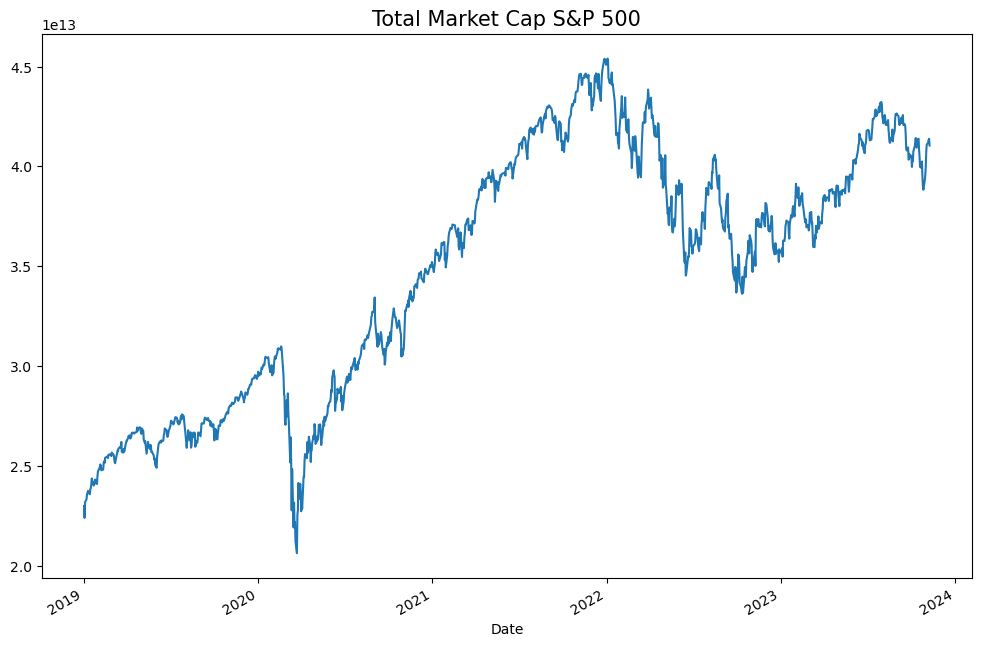

In [197]:
# Plor the total parket cap over
total_mcap.plot(figsize = (12, 8))
plt.title("Total Market Cap S&P 500", fontsize = 15)
plt.show()

---

# Index Tracking with Optimization (Part 3) - Tracking Quality of single Stocks

We want to check the tracking error __for each single instrument against the Index.__ 

> __In other words, how well single stock can track the SP-500 (the traking quality of single stock)__ 

In [198]:
returns

,A,AAL,AAPL,ABBV,ABT,ACGL,ACN,ADBE,ADI,ADM,...,XEL,XOM,XRAY,XYL,YUM,ZBH,ZBRA,ZION,ZTS,^GSPC
Date,,,,,,,,,,,,,,,,,,,,,
2019-01-02,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
2019-01-03,-0.036840,-0.074507,-0.099607,-0.032949,-0.047194,-0.015655,-0.034142,-0.039498,-0.060405,-0.004396,...,-0.003940,-0.015354,0.000528,-0.034281,-0.025153,-0.018088,-0.059908,-0.005532,-0.034564,-0.024757
2019-01-04,0.034614,0.065868,0.042689,0.032217,0.028541,0.023662,0.038884,0.048632,0.024278,0.023056,...,0.009786,0.036870,0.029016,0.042192,0.026026,0.034153,0.041462,0.030713,0.039235,0.034336
2019-01-07,0.021234,0.028402,-0.002226,0.014595,0.014976,-0.002274,0.003473,0.013573,0.006289,0.005035,...,-0.004330,0.005200,0.017944,-0.014789,-0.001093,0.000385,0.015166,0.003989,0.006017,0.007010
2019-01-08,0.014660,-0.016085,0.019063,0.004648,-0.012006,0.003798,0.025290,0.014918,0.024396,0.018607,...,0.011597,0.007271,-0.006799,0.009401,-0.001970,-0.022425,0.006697,0.009114,0.014894,0.009695
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
2023-11-03,0.043553,0.050877,-0.005181,-0.012844,-0.001251,-0.004538,0.017428,0.008860,0.021784,0.006766,...,-0.000655,-0.012190,0.023476,0.027781,0.016657,-0.013158,0.035266,0.046043,0.008203,0.009394
2023-11-06,-0.013667,-0.026711,0.014605,-0.001556,-0.008765,-0.004559,-0.001276,0.003176,-0.002084,-0.004801,...,-0.007701,-0.017721,-0.022253,-0.007944,0.000396,0.005057,-0.038637,-0.016686,0.005794,0.001753
2023-11-07,0.027992,0.007719,0.014451,0.006799,-0.002105,0.002936,0.006707,0.034928,0.003222,-0.006202,...,-0.012054,-0.015680,-0.005602,0.006344,-0.007200,-0.030833,0.009805,-0.002341,0.024453,0.002840


In [199]:
# A function for compute the tracking error

def tracking(returns_df, index):
    
    # compute the difference return for each stock (e.g AAPL) and the Index (SP-500) 
    active_returns = returns_df.sub(returns_df[index], axis = "rows")
    summary = pd.DataFrame(index = returns_df.columns)
    
    # Compute the tracking error
    summary["TrackingError"] = active_returns.std() * np.sqrt(252)
    # compute the active return
    log_returns = np.log(active_returns + 1)
    summary["ActiveReturn"] = np.exp(log_returns.mean() * 252) - 1
    
    return summary

In [200]:
tracking = tracking(returns, "^GSPC")
tracking

## Interpretation

# AAPL	0.199154	0.236565
# for AAPL,
# the tracking error different in 0.199154 from the Index (SP-500),
# and the  active return different in 0.236565 from the Index (SP-500).

# ^GSPC	0.000000	0.000000
# everything 0, because this is the index intelf... 

,TrackingError,ActiveReturn
A,0.204087,-0.012407
AAL,0.548433,-0.262629
AAPL,0.199154,0.236565
ABBV,0.241960,-0.041645
ABT,0.203458,-0.058813
...,...,...
ZBH,0.253992,-0.103308
ZBRA,0.309057,-0.043956
ZION,0.395095,-0.144751
ZTS,0.202023,0.029165


In [201]:
# Sort by tracking error
tracking.sort_values("TrackingError")

,TrackingError,ActiveReturn
^GSPC,0.000000,0.000000
BRK-B,0.131580,-0.009462
APH,0.153806,0.047662
MMC,0.158048,0.070752
AME,0.159682,0.052005
...,...,...
APA,0.649760,-0.016321
NCLH,0.678866,-0.271057
ENPH,0.706314,0.610562
PCG,0.737219,-0.171433


What we can see here?

- __^GSPC__: is the index
- __BRK-B__: is the most __best__ instument that __tracking__ as well to the __index__!   
- __PCG__: is the most __worse__ instument that __tracking__ as well to the __index__!   

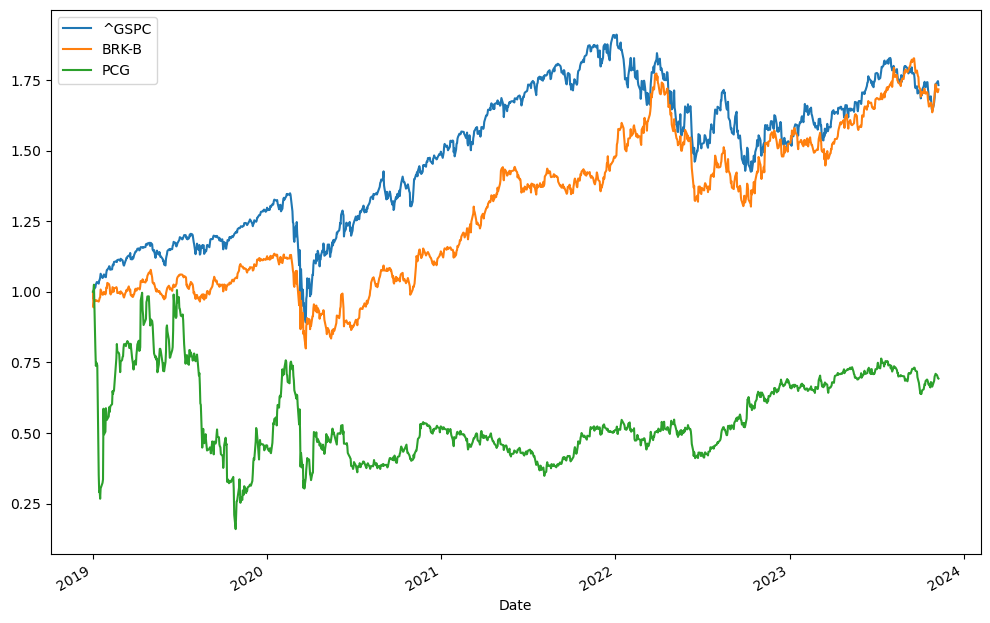

In [202]:
norm[["^GSPC", "BRK-B", "PCG"]].plot(figsize = (12, 8))
plt.show()

---

#  Index Tracking with Optimization (Part 4) - a random Tracking Portfolio

We are going to create random tracking portfolio, by picking `n` number of instuments. 

In [212]:
n = len(const)
n

488

In [213]:
i = 50 # number of stock in tracking portfolio
i

50

In [214]:
# pick `i` random instuments
np.random.seed(123)
tracking_stocks = np.random.choice(a = const, size = i, replace = False) # random sampling
tracking_stocks

array(['BX', 'UHS', 'ACGL', 'TRGP', 'TXT', 'ADSK', 'MHK', 'SLB', 'HRL',
       'K', 'ANET', 'AOS', 'ES', 'TFX', 'NSC', 'CDW', 'CVS', 'TPR', 'ADM',
       'LKQ', 'GRMN', 'MCK', 'DLTR', 'CINF', 'ANSS', 'CNC', 'WDC', 'RSG',
       'MNST', 'ALLE', 'SBUX', 'IVZ', 'FDX', 'AEP', 'ELV', 'DHR', 'IQV',
       'LW', 'SRE', 'EVRG', 'HIG', 'AFL', 'CAG', 'HLT', 'FICO', 'MO',
       'PPL', 'SYF', 'VTR', 'NTAP'], dtype=object)

In [215]:
# Compute the VWI (Weigth Value Index) over time. 
# How? 
# Market cap on instument / total market cap of all the instruments. 

weights_VWI = mcap[tracking_stocks].div(mcap[tracking_stocks].sum(axis = "columns"), axis = "rows")
weights_VWI

,BX,UHS,ACGL,TRGP,TXT,ADSK,MHK,SLB,HRL,K,...,HIG,AFL,CAG,HLT,FICO,MO,PPL,SYF,VTR,NTAP
Date,,,,,,,,,,,,,,,,,,,,,
2019-01-02,0.019163,0.007278,0.008407,0.007218,0.008351,0.024158,0.006539,0.045778,0.019591,0.015752,...,0.011987,0.024563,0.008872,0.016651,0.004020,0.076693,0.017963,0.009490,0.019745,0.011382
2019-01-03,0.018974,0.007321,0.008429,0.007478,0.008290,0.023251,0.006565,0.047130,0.020124,0.016073,...,0.012041,0.024388,0.009134,0.016090,0.003947,0.077691,0.018231,0.009594,0.020451,0.011045
2019-01-04,0.019106,0.007287,0.008401,0.007676,0.008423,0.023832,0.006678,0.047706,0.019603,0.015803,...,0.012084,0.024039,0.009017,0.016280,0.004073,0.077586,0.018296,0.009787,0.019816,0.011118
2019-01-07,0.019534,0.007219,0.008322,0.007935,0.008283,0.024481,0.006740,0.048674,0.019696,0.015764,...,0.011955,0.023995,0.009137,0.016349,0.004129,0.074703,0.018190,0.009767,0.019783,0.010983
2019-01-08,0.019512,0.007372,0.008272,0.008180,0.008400,0.024453,0.006616,0.048800,0.019555,0.015698,...,0.011679,0.023835,0.008695,0.016446,0.004167,0.074401,0.018250,0.009691,0.019787,0.010791
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
2023-11-03,0.041219,0.005095,0.017603,0.011097,0.009003,0.024495,0.003004,0.044861,0.009988,0.009884,...,0.013118,0.028444,0.007414,0.023593,0.012927,0.040548,0.010392,0.007557,0.009802,0.009178
2023-11-06,0.040195,0.005155,0.017534,0.011031,0.009019,0.024271,0.002924,0.044582,0.009891,0.009754,...,0.013098,0.028175,0.007318,0.023534,0.012899,0.040444,0.010309,0.007401,0.009853,0.009174
2023-11-07,0.040540,0.005186,0.017629,0.010803,0.008975,0.024731,0.002915,0.042199,0.009933,0.009694,...,0.013111,0.028098,0.007325,0.023853,0.013079,0.040514,0.010654,0.007379,0.009765,0.009170


In [216]:
# compute the tracking return (simple return of tracking portfolio)
# return of each stock * its shifted weigths, and then we sum it.  
tracking_returns = returns[tracking_stocks].mul(weights_VWI.shift()).sum(axis = "columns")
tracking_returns

Date
2019-01-02    0.000000
2019-01-03   -0.018248
2019-01-04    0.027083
2019-01-07    0.007202
2019-01-08    0.009824
                ...   
2023-11-03    0.012639
2023-11-06   -0.000650
2023-11-07   -0.002453
2023-11-08   -0.004090
2023-11-09   -0.006637
Length: 1224, dtype: float64

In [217]:
# Compute the tracking error
# the different between
# tracking portfolio returns and the Index return

# How much our portfolio track after the Index ? 

tracking_error = (tracking_returns - returns[index]).std() * np.sqrt(252)
tracking_error

0.07122008659913365

__Create 1000 random portfolios (each portfolio with 50 stocks)__

In [218]:
sims = 1000 # 1000 Simulations with 50 random stocks

In [219]:
# Create 1000 random portfolios, 
# calculate the tracking returns and the tracking error.
np.random.seed(123)
trerrors = []
for sim in range(sims):
    # choice random stock
    tracking_stocks = np.random.choice(a = const, size = i, replace = False)
    # compute VWI over the time
    weights_VWI = mcap[tracking_stocks].div(mcap[tracking_stocks].sum(axis = "columns"), axis = "rows")
    # compute the tracking return over time
    tracking_returns = returns[tracking_stocks].mul(weights_VWI.shift()).sum(axis = "columns")
    
    # then, compute the tracking error - 
    # the different between the portfolio trackin return & the index! 
    # so for compute that, I take the std of this different,
    # and multiply it by 255 for get the anuualize tracking error. 
    tracking_error = (tracking_returns - returns[index]).std() * np.sqrt(252)
    trerrors.append(tracking_error)
av_te = np.mean(trerrors)

In [220]:
av_te # sample size = 50

0.07504107892915937

---

# Index Tracking with Optimization (Part 5) - Does Sample Size matter?

> __Goal: Perform same analysis for different Sample Sizes (1, 11, 21, 31...)__

In [221]:
n

488

In [228]:
len(list(range(1, n + 1, 10))),list(range(1, n + 1, 10))[:10]

(49, [1, 11, 21, 31, 41, 51, 61, 71, 81, 91])

In [223]:
sims = 100 # 100 random sims per size

In [224]:
# Create 49 different random portfolios with different sample size!
# e.g, portfolio with 10 stocks, 20 stock, 30 stocks,.... 

# For each sample size, I create 100 random portfolios!
# we need enough observation for each sample size..
# e.g, 100 portsolios of sample of 10 random stocks, 
#      100 portsolios of sample of 20 random stocks
#      ... 

np.random.seed(123)
av_tres = []

# for each sample size
for i in range(1, n + 1, 10):
    trerrors = []
    # for each number of portfolios 
    for sim in range(sims):
        # create & compute tracking error (between random portfilio to the Index)
        # we already fmiliar with this code.. 
        tracking_stocks = np.random.choice(a = const, size = i, replace = False)
        weights_VWI = mcap[tracking_stocks].div(mcap[tracking_stocks].sum(axis = "columns"), axis = "rows")
        tracking_returns = returns[tracking_stocks].mul(weights_VWI.shift()).sum(axis = "columns")
        tracking_error = (tracking_returns - returns[index]).std() * np.sqrt(252)
        trerrors.append(tracking_error)
    av_tres.append(np.mean(trerrors))

In [225]:
# 
av_tres

[0.3032063882367689,
 0.131860691776654,
 0.10668555337472058,
 0.09267930148581048,
 0.0819001813036156,
 0.07514989190509017,
 0.06887035150768422,
 0.06379066484337177,
 0.05749777580311286,
 0.054969756548265004,
 0.05258743665692557,
 0.04998089548875703,
 0.04868115829424766,
 0.046440314132347,
 0.043866958591316896,
 0.04110895538954993,
 0.04023910344897241,
 0.03872052812810464,
 0.03693926578507275,
 0.03562926026317875,
 0.034067792068815855,
 0.03243925745017757,
 0.03150404424614082,
 0.030547567303190425,
 0.030241931467483784,
 0.029172348314387326,
 0.026720690117038357,
 0.027303862171848124,
 0.02606714011268947,
 0.02444821235757379,
 0.023352575145171302,
 0.024280581327964824,
 0.022054345942413022,
 0.022053469181249227,
 0.020864996495924798,
 0.02062883612129616,
 0.019547551161625647,
 0.018887189500059198,
 0.01831836960874499,
 0.017300252156655524,
 0.016421758183635476,
 0.015932937657063627,
 0.01557332313478086,
 0.015046487517712672,
 0.0142778173831202

__Plot the tracking error of each random portfolio with the Index__

> __Final conclusion__: __the more stocks (sample size) in the portfolio - the less tracking error!__  

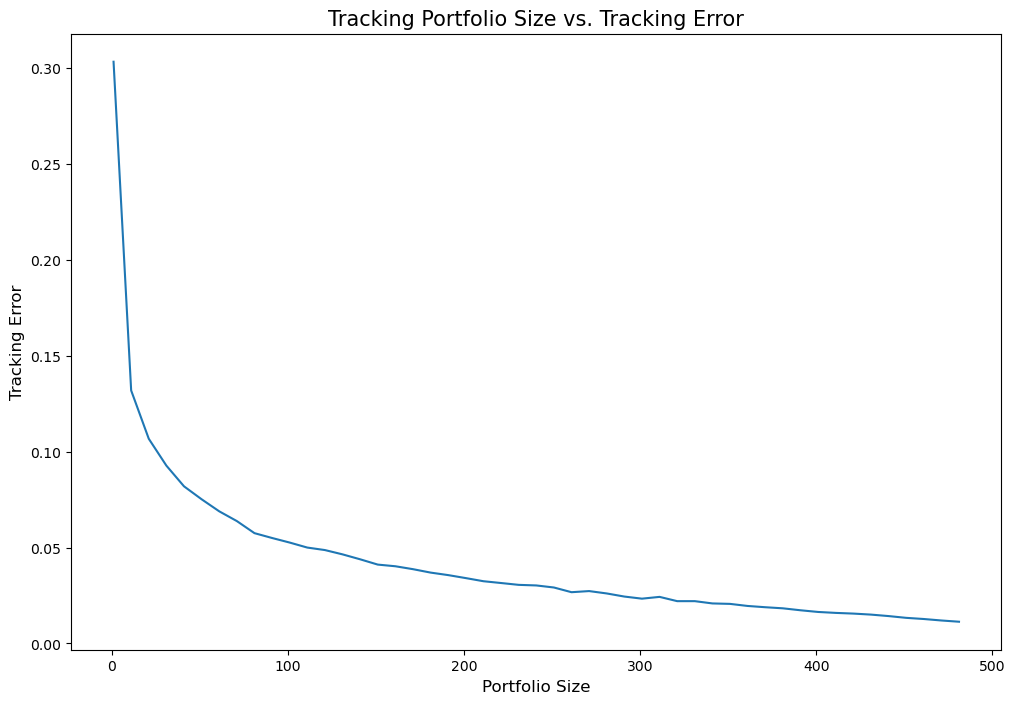

In [226]:
plt.figure(figsize = (12, 8))
plt.plot(range(1, n + 1, 10), av_tres)
plt.title("Tracking Portfolio Size vs. Tracking Error", fontsize = 15)
plt.xlabel("Portfolio Size", fontsize = 12)
plt.ylabel("Tracking Error", fontsize = 12)
plt.show()

- The larger the Sample, the better the Tracking Quality (minimizing Tracking Error)
- Marginal Benefit decreases

---

# Index Tracking with Optimization (Part 6): an Example 

In [230]:
n = len(const)
n

488

Target: Expected Tracking Error < 5%

In [231]:
i = 110
i

110

In [232]:
# 10,000 random portfolios -> find the best tracking one!
sims = 10000 

In [233]:
# find the best tracking one!
np.random.seed(123)
min_te = 1 # initial to the most worse err that can be. 
tstocks = None
tportfolio = None
for sim in range(sims):
   
    tracking_stocks = np.random.choice(a = const, size = i, replace = False)
   
    weights_VWI = mcap[tracking_stocks].div(mcap[tracking_stocks].sum(axis = "columns"), axis = "rows")
   
    tracking_returns = returns[tracking_stocks].mul(weights_VWI.shift()).sum(axis = "columns")
    active_returns = tracking_returns - returns[index]
    tracking_error = active_returns.std() * np.sqrt(252)
   
    tracking_portfolio = tracking_returns.add(1).cumprod() # normalized prices
    
    # Store the minimize one! 
    if tracking_error < min_te: # minimize TE
        min_te = tracking_error
        tstocks = tracking_stocks
        tportfolio = tracking_portfolio

In [234]:
# This is the minimum tracking err we have found! 
min_te

0.03292334105137667

In [235]:
tstocks

array(['AIG', 'ANET', 'HII', 'PCAR', 'EQR', 'CMS', 'MPC', 'BRK-B', 'ALGN',
       'BR', 'TGT', 'DAL', 'ED', 'CME', 'MU', 'STX', 'GE', 'POOL', 'DRI',
       'MTCH', 'JKHY', 'GILD', 'HAS', 'ETN', 'HCA', 'BEN', 'LOW', 'FDX',
       'CVX', 'EMR', 'PHM', 'VZ', 'QRVO', 'AOS', 'GLW', 'CDAY', 'NFLX',
       'EXC', 'JPM', 'UDR', 'BX', 'REGN', 'MHK', 'PLD', 'SRE', 'TSCO',
       'BLK', 'FE', 'CZR', 'BAC', 'VRTX', 'WMB', 'GD', 'EA', 'MA', 'NXPI',
       'GNRC', 'LYV', 'KEY', 'EQIX', 'AVGO', 'VRSN', 'CPB', 'ENPH', 'ES',
       'PG', 'SO', 'ADM', 'NOW', 'COO', 'MTD', 'CI', 'CMG', 'HSIC', 'GPC',
       'IT', 'DHR', 'MDLZ', 'CAG', 'EVRG', 'FRT', 'CL', 'VMC', 'L', 'AXP',
       'WDC', 'ETSY', 'MCHP', 'IVZ', 'PM', 'UPS', 'MAR', 'TXN', 'EW',
       'LVS', 'ALK', 'EIX', 'ADP', 'HES', 'ACGL', 'HRL', 'NDAQ', 'BIO',
       'UHS', 'CCL', 'MSFT', 'LHX', 'LYB', 'FFIV', 'CPT'], dtype=object)

In [236]:
# here's the best minimized portfolio
tportfolio

Date
2019-01-02    1.000000
2019-01-03    0.974577
2019-01-04    1.007670
2019-01-07    1.015516
2019-01-08    1.022794
                ...   
2023-11-03    1.865635
2023-11-06    1.866947
2023-11-07    1.870780
2023-11-08    1.873845
2023-11-09    1.863075
Length: 1224, dtype: float64

In [237]:
tportfolio.name = "Tracking_Portfolio"

__Plot the best random portfolio (from 10000 randoms) and the Index__

They are close!

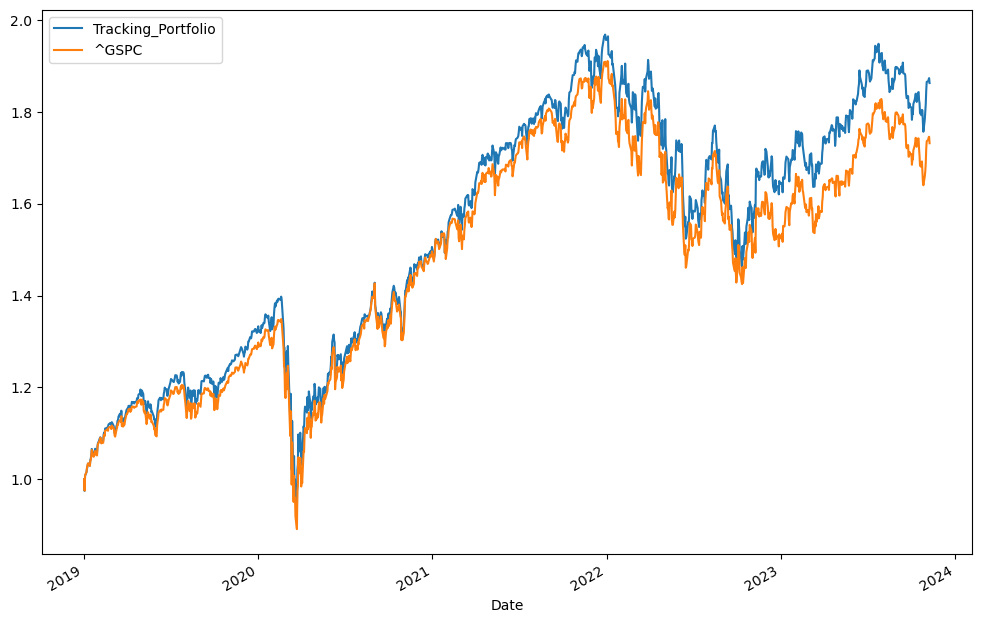

In [238]:
tportfolio.plot(figsize = (12, 8))
norm[index].plot()
plt.legend()
plt.show()

In [239]:
# add the tracking portfolio to the normalize data frame of all the 500 stock.
# `tportfolio` already normalize. 
norm["Tracking_Portfolio"] = tportfolio

In [240]:
def tracking(returns_df, index):
    active_returns = returns_df.sub(returns_df[index], axis = "rows")
    summary = pd.DataFrame(index = returns_df.columns)
    summary["TrackingError"] = active_returns.std() * np.sqrt(252)
    log_returns = np.log(active_returns + 1)
    summary["ActiveReturn"] = np.exp(log_returns.mean() * 252) - 1
    return summary

In [241]:
# compute the tracking return err of the portfolio & index. 
tracking(norm.pct_change(), index)


# See, that our Tracking_Portfolio, is show bettwe results,
# compare to each stock itself. (the more stocks, the tless e.)

,TrackingError,ActiveReturn
A,0.204087,-0.012407
AAL,0.548433,-0.262629
AAPL,0.199154,0.236565
ABBV,0.241960,-0.041645
ABT,0.203458,-0.058813
...,...,...
ZBRA,0.309057,-0.043956
ZION,0.395095,-0.144751
ZTS,0.202023,0.029165
^GSPC,0.000000,0.000000


We __optimized with historical data__ and tested tracking quality __"in-sample"__ on the same 
historical data! <br>
Problem: We __overestimate Tracking Quality__!<br>
__Better__: Testing Tracking Quality on future __"out-sample"__ data ("Forward Testing")

---

# Optimization and "out-sample" Testing (Part 1)

Splitting full Time Period into an __Optimization Period__ and a __Testing Period__

In [242]:
opt_start = "2019"
opt_end = "2021-06"

In [243]:
test_start = "2021-07"
test_end = "2022"

In [244]:
mcap.loc[opt_start:opt_end]

,A,AAL,AAPL,ABBV,ABT,ACGL,ACN,ADBE,ADI,ADM,...,WYNN,XEL,XOM,XRAY,XYL,YUM,ZBH,ZBRA,ZION,ZTS
Date,,,,,,,,,,,,,,,,,,,,,
2019-01-02,1.944691e+10,2.110878e+10,6.844777e+11,1.578018e+11,1.211787e+11,9.686975e+09,8.858288e+10,1.044025e+11,4.419222e+10,2.249524e+10,...,1.182994e+10,2.638832e+10,2.870040e+11,8.143011e+09,1.198653e+10,2.575754e+10,2.083855e+10,8.066640e+09,6.221106e+09,3.937376e+10
2019-01-03,1.873049e+10,1.953602e+10,6.162987e+11,1.526025e+11,1.154597e+11,9.535327e+09,8.555850e+10,1.002789e+11,4.152279e+10,2.239636e+10,...,1.171549e+10,2.628434e+10,2.825975e+11,8.147310e+09,1.157563e+10,2.510966e+10,2.046163e+10,7.583385e+09,6.186694e+09,3.801283e+10
2019-01-04,1.937882e+10,2.082283e+10,6.426081e+11,1.575188e+11,1.187551e+11,9.760949e+09,8.888533e+10,1.051557e+11,4.253090e+10,2.291273e+10,...,1.218801e+10,2.654155e+10,2.930167e+11,8.383712e+09,1.206403e+10,2.576317e+10,2.116046e+10,7.897810e+09,6.376709e+09,3.950426e+10
2019-01-07,1.979031e+10,2.141423e+10,6.411777e+11,1.598179e+11,1.205335e+11,9.738757e+09,8.919406e+10,1.065829e+11,4.279836e+10,2.302809e+10,...,1.240444e+10,2.642663e+10,2.945405e+11,8.534151e+09,1.188561e+10,2.573500e+10,2.116861e+10,8.017591e+09,6.402144e+09,3.974196e+10
2019-01-08,2.008043e+10,2.106979e+10,6.534006e+11,1.605606e+11,1.190864e+11,9.775744e+09,9.144975e+10,1.081728e+11,4.384247e+10,2.345657e+10,...,1.279310e+10,2.673309e+10,2.966820e+11,8.476124e+09,1.199735e+10,2.568430e+10,2.069389e+10,8.071286e+09,6.460495e+09,4.033387e+10
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
2021-06-24,4.342027e+10,1.452529e+10,2.312973e+12,2.029158e+11,1.947576e+11,1.436587e+10,1.837060e+11,2.688329e+11,8.591561e+10,3.388843e+10,...,1.406788e+10,3.626069e+10,2.657124e+11,1.370493e+10,2.107150e+10,3.295466e+10,3.349285e+10,2.635133e+10,8.110778e+09,8.640043e+10
2021-06-25,4.360085e+10,1.444080e+10,2.307772e+12,1.998033e+11,1.965361e+11,1.453601e+10,1.856592e+11,2.694837e+11,8.623450e+10,3.376208e+10,...,1.405768e+10,3.672037e+10,2.662890e+11,1.379304e+10,2.105889e+10,3.302790e+10,3.379031e+10,2.636476e+10,8.300793e+09,8.726266e+10
2021-06-28,4.379328e+10,1.390138e+10,2.336725e+12,1.998387e+11,2.017319e+11,1.433628e+10,1.851804e+11,2.737329e+11,8.773124e+10,3.339403e+10,...,1.368375e+10,3.669848e+10,2.594938e+11,1.358673e+10,2.148241e+10,3.270678e+10,3.335227e+10,2.721562e+10,7.997069e+09,8.719275e+10


__Optimization (Jan 2019 - Jun 2021)__

In [245]:
i = 110

In [246]:
start = opt_start
end = opt_end

In [247]:
# Find the best random portfolio....
np.random.seed(123)
min_te = 1
tstocks = None
tportfolio = None
for sim in range(sims):
    tracking_stocks = np.random.choice(a = const, size = i, replace = False)
    weights_VWI = mcap.loc[start:end,tracking_stocks].div(mcap.loc[start:end,tracking_stocks].sum(axis = "columns"), axis = "rows")
    tracking_returns = returns.loc[start:end, tracking_stocks].mul(weights_VWI.shift()).sum(axis = "columns")
    active_returns = tracking_returns - returns.loc[start:end, index]
    tracking_error = active_returns.std() * np.sqrt(252)
    tracking_portfolio = tracking_returns.add(1).cumprod()
    if tracking_error < min_te:
        min_te = tracking_error
        tstocks = tracking_stocks
        tportfolio = tracking_portfolio

In [248]:
min_te

0.029088864901232282

In [249]:
tstocks

array(['PODD', 'BWA', 'JNJ', 'FRT', 'SBAC', 'ITW', 'BXP', 'AMGN', 'LW',
       'CHD', 'CME', 'PYPL', 'EVRG', 'LRCX', 'BALL', 'MHK', 'WFC', 'SRE',
       'INCY', 'EBAY', 'GNRC', 'CINF', 'JBHT', 'CMG', 'NOC', 'MSFT',
       'SYF', 'O', 'BG', 'VRSK', 'HBAN', 'AMCR', 'NEM', 'KO', 'TRGP',
       'FLT', 'BRK-B', 'COF', 'DVN', 'HPE', 'ECL', 'WY', 'ENPH', 'FMC',
       'BBY', 'REGN', 'WM', 'SBUX', 'HES', 'DAL', 'STLD', 'LIN', 'AON',
       'KEY', 'ETSY', 'IBM', 'WYNN', 'WDC', 'CHTR', 'META', 'AKAM', 'CZR',
       'MRNA', 'AIZ', 'NEE', 'COST', 'CB', 'XYL', 'VMC', 'TFC', 'STZ',
       'BBWI', 'BMY', 'DHI', 'CLX', 'MAR', 'ELV', 'CVX', 'HAS', 'AVY',
       'AFL', 'CTRA', 'ADM', 'ALB', 'SWKS', 'ACGL', 'MPC', 'HRL', 'LDOS',
       'SEE', 'EXR', 'EXC', 'ORCL', 'SPG', 'VTR', 'HUM', 'AJG', 'STE',
       'LUV', 'JPM', 'MOS', 'PNC', 'CPT', 'CTAS', 'TMUS', 'MS', 'PG',
       'EOG', 'EQIX', 'AVGO'], dtype=object)

In [250]:
tportfolio

Date
2019-01-02    1.000000
2019-01-03    0.974494
2019-01-04    1.005181
2019-01-07    1.009333
2019-01-08    1.016769
                ...   
2021-06-24    1.733451
2021-06-25    1.738955
2021-06-28    1.747764
2021-06-29    1.748655
2021-06-30    1.749862
Length: 629, dtype: float64

In [251]:
tportfolio.name = "Tracking_Portfolio"

In [252]:
# concatinate the optimal Tracking Portfolio and the Index. 
opt = pd.concat([tportfolio.loc[start:end], norm.loc[start:end, index]], axis = 1)
opt

,Tracking_Portfolio,^GSPC
Date,,
2019-01-02,1.000000,1.000000
2019-01-03,0.974494,0.975243
2019-01-04,1.005181,1.008729
2019-01-07,1.009333,1.015801
2019-01-08,1.016769,1.025649
...,...,...
2021-06-24,1.733451,1.699777
2021-06-25,1.738955,1.705438
2021-06-28,1.747764,1.709386


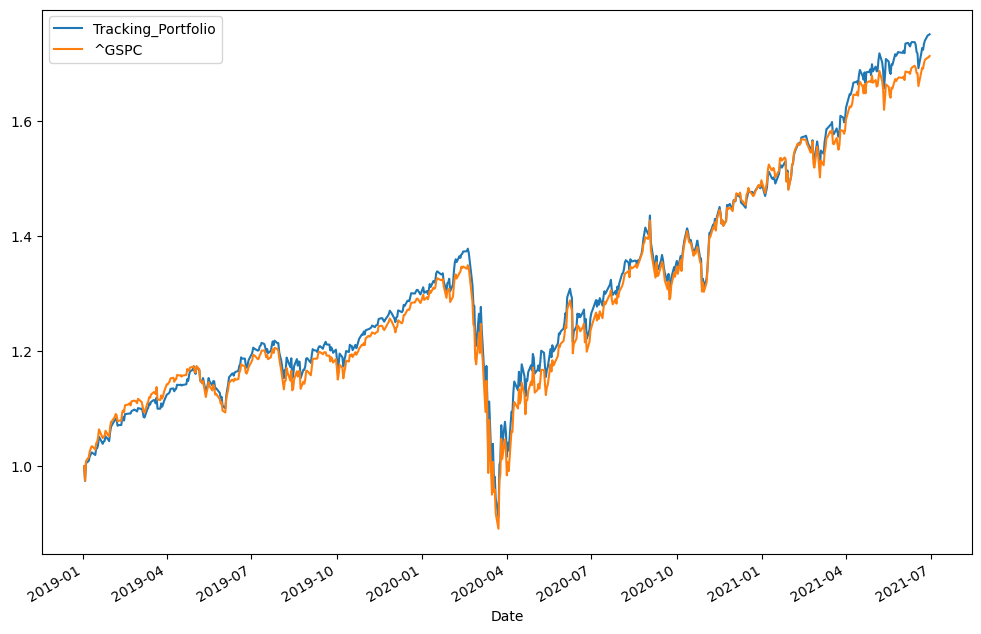

In [253]:
# And plot that 
opt.plot(figsize = (12, 8))
plt.legend()
plt.show()

In [254]:
# Measure the tracking err
def tracking(returns_df, index):
    active_returns = returns_df.sub(returns_df[index], axis = "rows")
    summary = pd.DataFrame(index = returns_df.columns)
    summary["TrackingError"] = active_returns.std() * np.sqrt(252)
    log_returns = np.log(active_returns + 1)
    summary["ActiveReturn"] = np.exp(log_returns.mean() * 252) - 1
    return summary

In [255]:
tracking(opt.pct_change(), index)

,TrackingError,ActiveReturn
Tracking_Portfolio,0.029089,0.008198
^GSPC,0.000000,0.000000


### "out-sample" Testing (Jul 2021 - Nov 2022)

> our best choise portfolio will be the best tracking to the index also in the future? Let's make forward testing! 

In [256]:
tstocks # optimal Tracking Portfolio

array(['PODD', 'BWA', 'JNJ', 'FRT', 'SBAC', 'ITW', 'BXP', 'AMGN', 'LW',
       'CHD', 'CME', 'PYPL', 'EVRG', 'LRCX', 'BALL', 'MHK', 'WFC', 'SRE',
       'INCY', 'EBAY', 'GNRC', 'CINF', 'JBHT', 'CMG', 'NOC', 'MSFT',
       'SYF', 'O', 'BG', 'VRSK', 'HBAN', 'AMCR', 'NEM', 'KO', 'TRGP',
       'FLT', 'BRK-B', 'COF', 'DVN', 'HPE', 'ECL', 'WY', 'ENPH', 'FMC',
       'BBY', 'REGN', 'WM', 'SBUX', 'HES', 'DAL', 'STLD', 'LIN', 'AON',
       'KEY', 'ETSY', 'IBM', 'WYNN', 'WDC', 'CHTR', 'META', 'AKAM', 'CZR',
       'MRNA', 'AIZ', 'NEE', 'COST', 'CB', 'XYL', 'VMC', 'TFC', 'STZ',
       'BBWI', 'BMY', 'DHI', 'CLX', 'MAR', 'ELV', 'CVX', 'HAS', 'AVY',
       'AFL', 'CTRA', 'ADM', 'ALB', 'SWKS', 'ACGL', 'MPC', 'HRL', 'LDOS',
       'SEE', 'EXR', 'EXC', 'ORCL', 'SPG', 'VTR', 'HUM', 'AJG', 'STE',
       'LUV', 'JPM', 'MOS', 'PNC', 'CPT', 'CTAS', 'TMUS', 'MS', 'PG',
       'EOG', 'EQIX', 'AVGO'], dtype=object)

In [257]:
start = test_start
end = test_end

In [258]:
weights_VWI = mcap.loc[start:end,tstocks].div(mcap.loc[start:end,tstocks].sum(axis = "columns"), axis = "rows")
tracking_returns = returns.loc[start:end, tstocks].mul(weights_VWI.shift()).sum(axis = "columns")
active_returns = tracking_returns - returns.loc[start:end, index]
tracking_error = active_returns.std() * np.sqrt(252)
tracking_portfolio = tracking_returns.add(1).cumprod()

In [259]:
tracking_error

0.03949055362314422

In [260]:
tracking_returns

Date
2021-07-01    0.000000
2021-07-02    0.006199
2021-07-06   -0.005054
2021-07-07    0.004129
2021-07-08   -0.008741
                ...   
2022-12-23    0.006159
2022-12-27   -0.001971
2022-12-28   -0.010055
2022-12-29    0.015208
2022-12-30   -0.002264
Length: 379, dtype: float64

In [261]:
tracking_returns.name = "Tracking Portfolio"

In [262]:
test = pd.concat([tracking_returns.loc[start:end], returns.loc[start:end, index]], axis = 1)
test

,Tracking Portfolio,^GSPC
Date,,
2021-07-01,0.000000,0.005222
2021-07-02,0.006199,0.007500
2021-07-06,-0.005054,-0.002022
2021-07-07,0.004129,0.003359
2021-07-08,-0.008741,-0.008561
...,...,...
2022-12-23,0.006159,0.005868
2022-12-27,-0.001971,-0.004050
2022-12-28,-0.010055,-0.012021


In [263]:
tracking(test, index)

,TrackingError,ActiveReturn
Tracking Portfolio,0.039491,0.010427
^GSPC,0.000000,0.000000


In [264]:
test = test.add(1).cumprod()
test

,Tracking Portfolio,^GSPC
Date,,
2021-07-01,1.000000,1.005222
2021-07-02,1.006199,1.012761
2021-07-06,1.001113,1.010713
2021-07-07,1.005247,1.014108
2021-07-08,0.996460,1.005426
...,...,...
2022-12-23,0.911261,0.894664
2022-12-27,0.909464,0.891041
2022-12-28,0.900319,0.880330


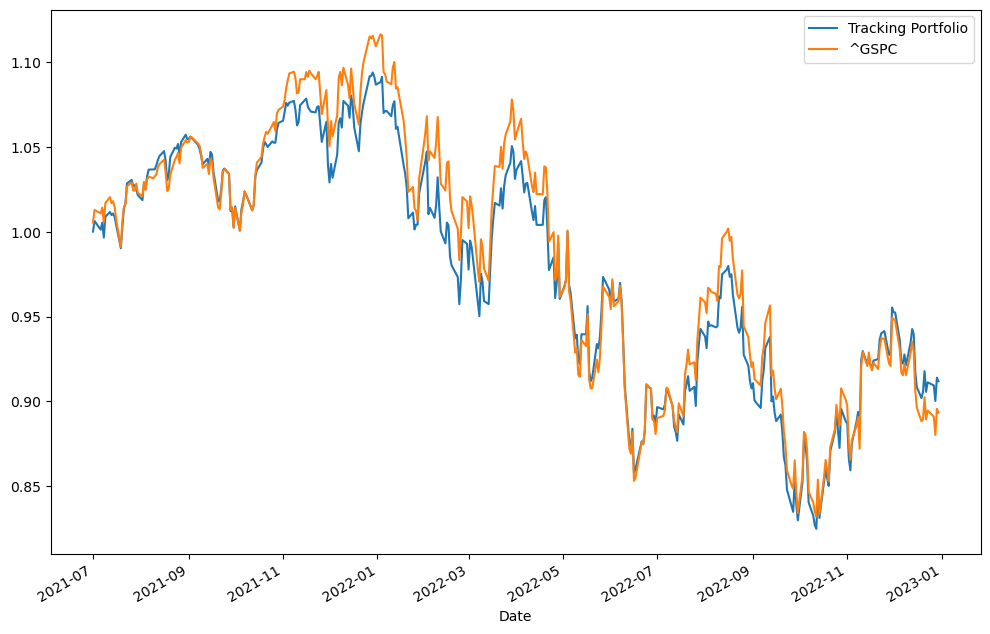

In [265]:
test.plot(figsize = (12, 8))
plt.legend()
plt.show()

- Higher Tracking Error and Active Return in "out-sample" Testing
- Reduce Active Return with 
    - Stratified Sampling
    - Larger Sample Size